# BioBot_FDS_01: Prepare_Data_Threshold_Classifier
## Deliverable_01: Data preparation and Threshold-based Classifier
Author/code developer: Yan Bello. 14/10/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---




In [1]:
!ls
#!mkdir gdrive
!ls


sample_data
sample_data


In [2]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive: 
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_Dataset/"

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
print(FILE_DIRECTORY)
print(SisFall_ALL_DIRECTORY)

gdrive/My Drive/Colab Notebooks/
gdrive/My Drive/Colab Notebooks/SisFall_Dataset/


In [5]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [6]:
from google.colab import files
import zipfile #, io, os

print(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip')


zfile = zipfile.ZipFile(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip', 'r') 
zfile.extractall('data/')

gdrive/My Drive/Colab Notebooks/SisFall_Dataset/SisFall_dataset.zip


In [0]:
#     def __generate_activity_label_from_path():
#         for i, v in enumerate(self.file_path):
#             label, ext = os.path.splitext(os.path.basename(v))
#             activity, subject, trial = label.split("_")
#             self.activity_list.append([v, activity, subject, trial])

#     def __create_activity_dataframe():
#         df_activity = pd.DataFrame(self.activity_list,
#                                    columns={'path': [0], 'activity': [1], 'subject': [2], 'trial': [3]})
#         aa = self.activity_list
#         return df_activity

#     def __convert_to_accel(df):
#         df['ax'] = df['ax'] * 32.0 / 8192.0  # ax * 2 * scale / 2^resolution
#         df['ay'] = df['ay'] * 32.0 / 8192.0
#         df['az'] = df['az'] * 32.0 / 8192.0
#         df['t'] = df.index * 0.005
#         return df
      
#      def __sliding_window(self, df, i):
#         return df['ax'][i:i + self.window], df['ay'][i:i + self.window], df['az'][i:i + self.window]

#     def __generate_c8_feature(self, df):
#         max_c8 = 0
#         for i, v in enumerate(df['ax']):
#             if i < len(df['ax']) - self.window:
#                 axk, ayk, azk = self.__sliding_window(df, i)
#                 c8 = np.sqrt(np.var(axk) + np.var(azk))
#                 if c8 > max_c8:
#                     max_c8 = c8
#         return max_c8

## 1.1 Prepare a dataframe with all files from ADL/Falls dataset
Note: using the file naming convention, we can "decode" the Activity type (ADL VS. Fall type), Age category, etc. 

In [7]:
# Import required libraries
import os
from os import walk
import pandas as pd
import numpy as np
import glob

# The dataset files must be located in the "SisFall_dataset_ALL" folder 

file_names = []
dir_names = []

SisFall_ALL_DIRECTORY2 = 'data/SisFall_dataset'

file_path = glob.glob(SisFall_ALL_DIRECTORY2+'/*/*.txt')
file_name = [os.path.basename(p) for p in file_path]
print(file_name)
#__generate_activity_label_from_path()

# # Recursively scan the directory and sub-directory for filenames...
# for (dirpath, dirnames, filenames) in walk(SisFall_ALL_DIRECTORY2):
#     #file_names.extend(filenames)
#     print(dirpath, dirnames)

# Create a dataframe and load filenames into the File column
df_Files_Trials = pd.DataFrame({"File": file_name, "Path": file_path})
#print(df_Files_Trials['File'][0])
#print(df_Files_Trials.Path[0])

# Define a function fn to compute the values of the new column Act_Type
fn = lambda row: (row.File[0:3]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
df_Files_Trials = df_Files_Trials.assign(Act_Type=col.values) # assign values to column 'Act_Type'

# Define a function fn to compute the values of the new column Age_Cat
fn = lambda row: (row.File[4:6]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
#print(col)
df_Files_Trials = df_Files_Trials.assign(Age_Cat=col.values) # assign values to column 'Age_Cat'
print(df_Files_Trials.loc)

# assign initial values to the following columns
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_HOR=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_HOR=0)


# in MS Windows systems,  desktop.ini file is automatically generated. Let's get rid of it...
df_Files_Trials.drop(df_Files_Trials.loc[df_Files_Trials['File']=="desktop.ini"].index, inplace=True)

# lets preview the header and tail of the dataset
print(df_Files_Trials.head())
print(df_Files_Trials.tail())

# Note: this dataset includes 4.500 files. You should get this number of entries in the dataset.

['D02_SA19_R01.txt', 'F12_SA19_R03.txt', 'D15_SA19_R03.txt', 'F10_SA19_R02.txt', 'F07_SA19_R05.txt', 'F10_SA19_R04.txt', 'D15_SA19_R02.txt', 'F11_SA19_R03.txt', 'D12_SA19_R02.txt', 'F07_SA19_R02.txt', 'F12_SA19_R04.txt', 'F06_SA19_R04.txt', 'D10_SA19_R03.txt', 'D10_SA19_R01.txt', 'F03_SA19_R02.txt', 'F15_SA19_R05.txt', 'F11_SA19_R04.txt', 'F08_SA19_R01.txt', 'F15_SA19_R03.txt', 'F06_SA19_R05.txt', 'F10_SA19_R05.txt', 'D18_SA19_R04.txt', 'F10_SA19_R01.txt', 'D12_SA19_R05.txt', 'D17_SA19_R05.txt', 'D05_SA19_R02.txt', 'F04_SA19_R03.txt', 'D17_SA19_R04.txt', 'F02_SA19_R01.txt', 'F12_SA19_R01.txt', 'D12_SA19_R03.txt', 'D06_SA19_R03.txt', 'F01_SA19_R05.txt', 'F08_SA19_R05.txt', 'D10_SA19_R02.txt', 'F01_SA19_R03.txt', 'F15_SA19_R02.txt', 'F02_SA19_R05.txt', 'F13_SA19_R04.txt', 'F04_SA19_R05.txt', 'F03_SA19_R03.txt', 'F03_SA19_R05.txt', 'F06_SA19_R02.txt', 'F15_SA19_R04.txt', 'D01_SA19_R01.txt', 'F08_SA19_R02.txt', 'D07_SA19_R04.txt', 'F02_SA19_R03.txt', 'F03_SA19_R01.txt', 'D09_SA19_R03.txt',

## 1.4 Read and process each trial file to include acc metrics
Note: In the following cells, each trial file is read and processed to add columns
      with calculated metrics, based on acceleration data.
      Consult/refer to SisFall dataset info on how to compute the g measures.

In [8]:
# import libraries
import pandas as pd
import numpy as np
import os

# the following function reads a file (passed as a parameter) and process it.
def read_trial(trial_file_name):
    # Create a data frame and load data from the trial file...
    df_Mediciones = pd.DataFrame(pd.read_csv(trial_file_name, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))
    
    #print(df_Mediciones)
    print(df_Mediciones.shape)
    
    
    
    """
    ---------------------------------------------------
    Note: extract from SisFall Dataset info, 
          about the accelerometer sensors:
    ---------------------------------------------------
    Data are in bits with the following characteristics:
    
    In order to convert the acceleration data (AD) given 
    in bits into gravity, use this equation: 
        Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
    
    In order to convert the rotation data (RD) given in 
    bits into angular velocity, use this equation:
        Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    ---------------------------------------------------
    """
    
    # Calculate the values for SENSOR_1
    import math
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)

    # define a function for the values of the new column
    fn = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_XYZ=col.values) # assign values to new column

    # define a function for the values of the new column
    fn_hor = lambda row: math.sqrt((g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn_hor, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_HOR=col.values) # assign values to new column
    
    
    # Calculate the values for SENSOR_3
    Sensor3_Resolution = 14
    Sensor3_Range = 8
    g_S3 = (2*Sensor3_Range/2**Sensor3_Resolution)

    # we need to remove a "noisy" ";" semicolon remaining in the file/column S3_Z
    df_Mediciones['S3_Z'] = df_Mediciones['S3_Z'].map(lambda x: x.rstrip(';'))
    df_Mediciones.S3_Z = df_Mediciones.S3_Z.astype(np.int64)

    # define a function for the values of the new column
    fn3 = lambda row: math.sqrt((g_S3*row.S3_X)**2 + (g_S3*row.S3_Y)**2 + (g_S3*row.S3_Z)**2)
    col = df_Mediciones.apply(fn3, axis=1) 
    df_Mediciones = df_Mediciones.assign(S3_N_XYZ=col.values) # assign values to new column 

    # define a function for the values of the new column
    fn3_hor = lambda row: math.sqrt((g_S3*row.S3_Y)**2 + (g_S3*row.S3_Z)**2) 
    col = df_Mediciones.apply(fn3_hor, axis=1) 
    df_Mediciones = df_Mediciones.assign(S3_N_HOR=col.values) # assign values to new column 
    
    # Display the head of the data frame
    #print(df_Mediciones.head())
    #print("____________________________")
    
    # Get the max value of N_XYZ, for both sensors
    S1_max_N_XYZ = np.max(df_Mediciones.S1_N_XYZ)
    print("S1_max_N_XYZ = " + str(S1_max_N_XYZ))
    S3_max_N_XYZ = np.max(df_Mediciones.S3_N_XYZ)
    print("S3_max_N_XYZ = " + str(S3_max_N_XYZ))

    # Get the max value of N_HOR, for both sensors
    S1_max_N_HOR = np.max(df_Mediciones.S1_N_HOR)
    print("S1_max_N_HOR = " + str(S1_max_N_HOR))
    S3_max_N_HOR = np.max(df_Mediciones.S3_N_HOR)
    print("S3_max_N_HOR = " + str(S3_max_N_HOR))
    
    return S1_max_N_XYZ, S1_max_N_HOR, S3_max_N_XYZ, S3_max_N_HOR

# In this sections, we iterate through all the files to process them...
# NOTE: to filter a specific type of activity use the following line with the corresponding activity code
# for example to filter (and only process) ADL type D01:
# file_list = df_Files_Trials[df_Files_Trials.Act_Type == "D01"][["File"]]
# Otherwise the follwing line process all types of ADL and Falls:
file_list = df_Files_Trials
#print(file_list)
total_num_iter = len(file_list)
iter_no = 1

# Loop to iterate through all trial files...
for index, row in file_list.iterrows():
    my_data_file_name = row['Path']  #SisFall_ALL_DIRECTORY + 
    print("_________ ITERATION NO: " + str(iter_no) + "/" + str(total_num_iter) + " (TOTAL)___________________________")
    iter_no +=1
    print("_________ PROCESSING TRIAL FILE: " + row['File'] + " ___________________________")
    #print(my_data_file_name)
    S1_max_N_XYZ, S1_max_N_HOR, S3_max_N_XYZ, S3_max_N_HOR = read_trial(my_data_file_name)
    #print(df_Files_Trials.File == row['File'])
    
    df_Files_Trials.loc[index,"S1_Max_N_XYZ"] = S1_max_N_XYZ
    df_Files_Trials.loc[index,"S1_Max_N_HOR"] = S1_max_N_HOR
    df_Files_Trials.loc[index,"S3_Max_N_XYZ"] = S3_max_N_XYZ
    df_Files_Trials.loc[index,"S3_Max_N_HOR"] = S3_max_N_HOR

#     df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S1_Max_N_XYZ"] = S1_max_N_XYZ
#     df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S1_Max_N_HOR"] = S1_max_N_HOR
#     df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S3_Max_N_XYZ"] = S3_max_N_XYZ
#     df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S3_Max_N_HOR"] = S3_max_N_HOR
    print("________________________________________________________________________________________")    


_________ ITERATION NO: 1/4505 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D02_SA19_R01.txt ___________________________
(20000, 9)
       S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y   S3_Z  S1_N_XYZ  \
0       -20  -248   -57   -53   117    12  -108  -954  -142;  0.997074   
1       -19  -251   -56   -58   116    11  -112  -957  -145;  1.007313   
2       -20  -247   -55   -59   115    15  -111  -956  -143;  0.991557   
3       -20  -246   -54   -61   114    14  -112  -953  -144;  0.986914   
4       -23  -246   -53   -63   113    17  -112  -952  -139;  0.987084   
5       -21  -249   -50   -63   114    16  -114  -953  -145;  0.995458   
6       -20  -247   -52   -67   114    20  -110  -951  -148;  0.989084   
7       -21  -249   -54   -71   114    18  -111  -954  -147;  0.998641   
8       -17  -247   -54   -75   117    21  -112  -955  -148;  0.989863   
9       -19  -250   -52   -79   117    18  -108  -958  -145;  1.000221   
10      -20  -249   -53   -80  

KeyboardInterrupt: ignored

## 1.5 Visualize the distribution of acceleration data with Boxplots
Note: The following cells prepare and display boxplots with acceleration data, which allows for a 
      quick comparation between Max/Min of acceleration g's, for ADLs VS. Falls.
      These results illustrate (visually) the possible (best) performance of Threshold-based classifier.

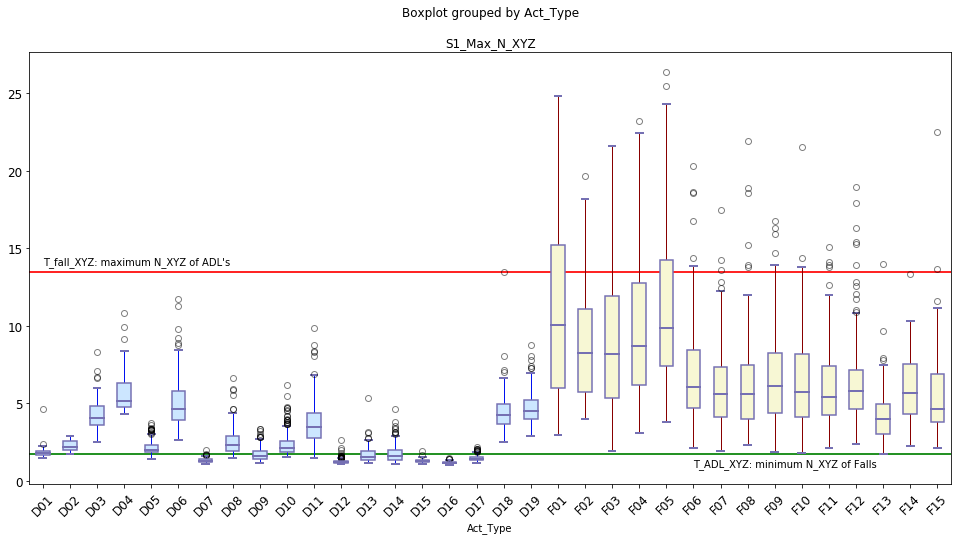

In [0]:
# This cell computes and visualize acceleration data for SENSOR S1, and XYZ Acceleration Norm Values

# Import library
import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax1 = fig.add_subplot(111)

# create the boxplot
bp = df_Files_Trials.boxplot(column='S1_Max_N_XYZ', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax1, return_type='dict', grid=False,
                            patch_artist=True)

# Get "extreme" values to compare
T_fall_XYZ = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S1_Max_N_XYZ)
T_ADL_XYZ = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S1_Max_N_XYZ)

# draw horizontal lines
ax1.axhline(y=T_fall_XYZ,xmin=0,xmax=3,c="red",linewidth=1.7,zorder=0)
ax1.axhline(y=T_ADL_XYZ,xmin=0,xmax=3,c="green",linewidth=1.7,zorder=0)

# write textlines
ax1.text(1, T_fall_XYZ + 0.5, "T_fall_XYZ: maximum N_XYZ of ADL's")
ax1.text(25, T_ADL_XYZ - 0.8, "T_ADL_XYZ: minimum N_XYZ of Falls")

# change whiskers
index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#0011F0', linewidth=1)
    else:
        whisker.set(color='#880000', linewidth=1)
    index +=1

# change colors based on index (as we know which are ADLs and Falls)    
index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#7570b3', linewidth=1.5)
        # change fill color
        box.set( facecolor = '#cce6ff' )
        index +=1
    else:
        # change outline color
        box.set( color='#7570b3', linewidth=1.5)
        # change fill color
        box.set( facecolor = '#f7f7d4' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#7570b3', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

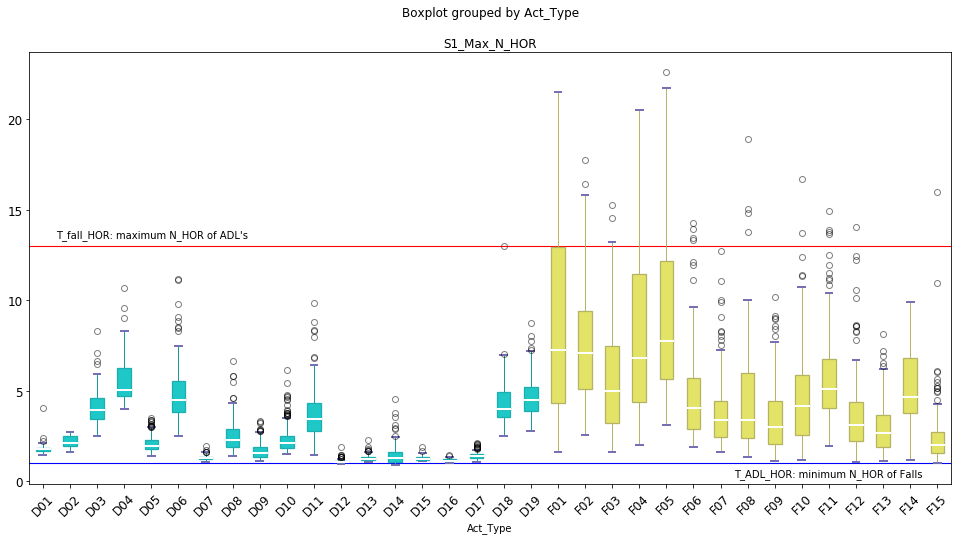

In [0]:
# This cell is similar to the previous one. 
# So it computes and visualize acceleration data for SENSOR S1, and HOR Acceleration Norm Values

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax2 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S1_Max_N_HOR', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax2, return_type='dict', grid=False,
                            patch_artist=True)

T_fall_HOR = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S1_Max_N_HOR)
T_ADL_HOR = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S1_Max_N_HOR)

ax2.axhline(y=T_fall_HOR,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax2.axhline(y=T_ADL_HOR,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax2.text(1.5, T_fall_HOR + 0.5, "T_fall_HOR: maximum N_HOR of ADL's")
ax2.text(26.5, T_ADL_HOR - 0.7, "T_ADL_HOR: minimum N_HOR of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

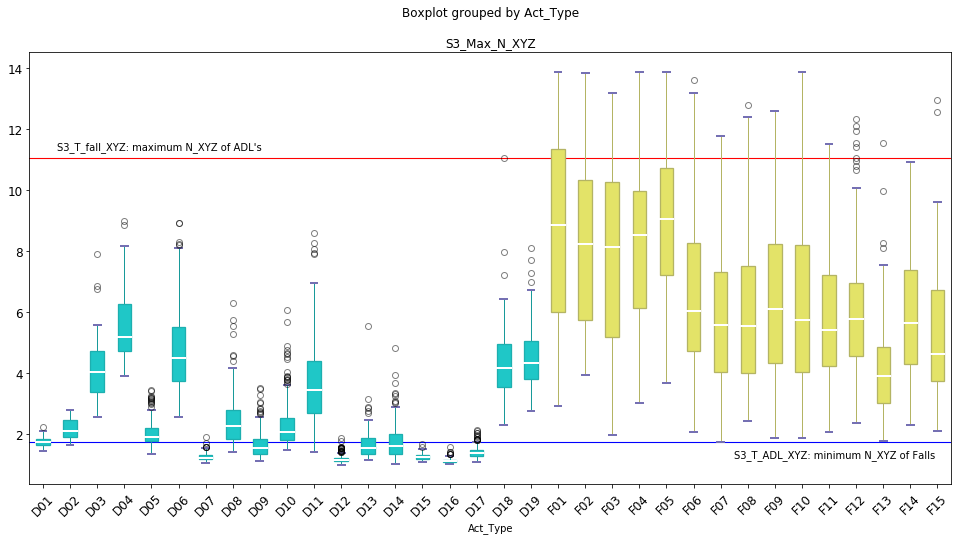

In [0]:
# This cell is similar to the previous ones... 
# This one computes and visualize acceleration data for SENSOR S3, and XYZ Acceleration Norm Values.

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax3 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S3_Max_N_XYZ', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax3, return_type='dict', grid=False,
                            patch_artist=True)

S3_T_fall_XYZ = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S3_Max_N_XYZ)
S3_T_ADL_XYZ = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S3_Max_N_XYZ)

ax3.axhline(y=S3_T_fall_XYZ,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax3.axhline(y=S3_T_ADL_XYZ,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax3.text(1.5, S3_T_fall_XYZ + 0.3, "S3_T_fall_XYZ: maximum N_XYZ of ADL's")
ax3.text(26.5, S3_T_ADL_XYZ - 0.5, "S3_T_ADL_XYZ: minimum N_XYZ of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


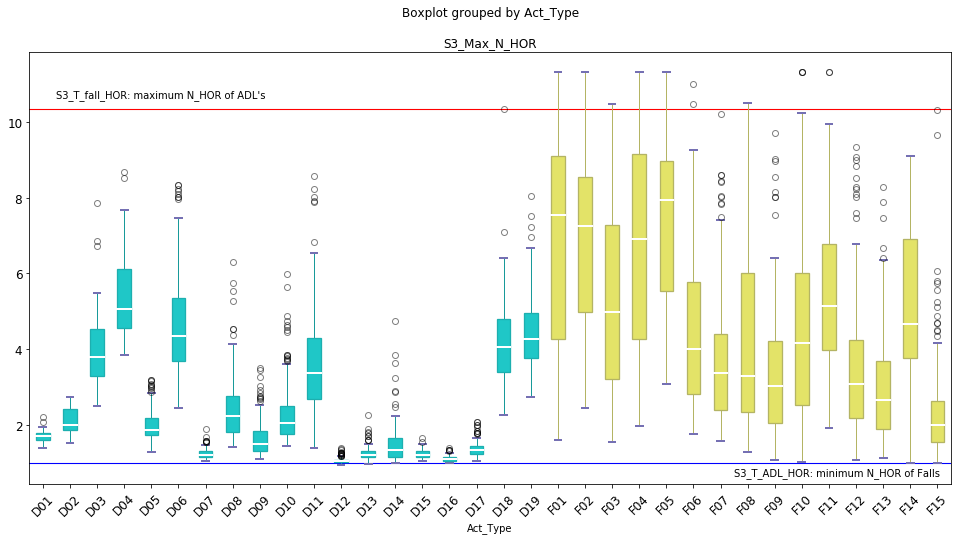

In [0]:
# This cell is similar to the previous ones... 
# This one computes and visualize acceleration data for SENSOR S3, and HOR Acceleration Norm Values.

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax4 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S3_Max_N_HOR', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax4, return_type='dict', grid=False,
                            patch_artist=True)

S3_T_fall_HOR = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S3_Max_N_HOR)
S3_T_ADL_HOR = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S3_Max_N_HOR)

ax4.axhline(y=S3_T_fall_HOR,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax4.axhline(y=S3_T_ADL_HOR,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax4.text(1.5, S3_T_fall_HOR + 0.3, "S3_T_fall_HOR: maximum N_HOR of ADL's")
ax4.text(26.5, S3_T_ADL_HOR - 0.3, "S3_T_ADL_HOR: minimum N_HOR of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

## 1.6 Compute several performance metrics for the Threshold-based Classification
Note: These basic metrics show the low performance and poor effectiveness of this approach to classification.

In [0]:
# Calculating some summary "stats" for Falls
print("S3_T_fall_HOR: " + str(S3_T_fall_HOR))
print("S3_T_fall_XYZ: " + str(S3_T_fall_XYZ))
num_Certain_Falls = len(df_Files_Trials[(df_Files_Trials.S3_Max_N_HOR > S3_T_fall_HOR) 
                                                   & (df_Files_Trials.S3_Max_N_XYZ > S3_T_fall_XYZ)])

print("Certain falls: " + str(num_Certain_Falls))

df_Falls = df_Files_Trials[df_Files_Trials.File.str.contains('F')]
print("True falls: " + 
      str(len(df_Falls[(df_Falls.S3_Max_N_HOR > S3_T_fall_HOR) & (df_Falls.S3_Max_N_XYZ > S3_T_fall_XYZ)])))

# Calculating some summary "stats" for ADLs
print("S3_T_ADL_HOR: " + str(S3_T_ADL_HOR))
print("S3_T_ADL_XYZ: " + str(S3_T_ADL_XYZ))
num_Certain_ADLs = len(df_Files_Trials[(df_Files_Trials.S3_Max_N_HOR < S3_T_ADL_HOR) 
                                                   & (df_Files_Trials.S3_Max_N_XYZ < S3_T_ADL_XYZ)])

print("Certain ADLs: " + str(num_Certain_ADLs))

df_ADLs = df_Files_Trials[df_Files_Trials.File.str.contains('D')]
print("True ADLs: " + 
      str(len(df_ADLs[(df_ADLs.S3_Max_N_HOR < S3_T_ADL_HOR) & (df_ADLs.S3_Max_N_XYZ < S3_T_ADL_XYZ)])))


print("% of effectiveness (on Falls) : " + str(num_Certain_Falls/len(df_Falls)))
print("% of effectiveness (on ADLs) : " + str(num_Certain_ADLs/len(df_ADLs)))

S3_T_fall_HOR: 10.345431971872
S3_T_fall_XYZ: 11.040839330999006
Certain falls: 63
True falls: 63
S3_T_ADL_HOR: 0.9875828382296458
S3_T_ADL_XYZ: 1.7345930082754024
Certain ADLs: 11
True ADLs: 11
% of effectiveness (on Falls) : 0.035038932146829814
% of effectiveness (on ADLs) : 0.0040710584752035525


## 1.7 Process the ADL/Falls data files and create baseline dataset
Note: In this cell, we compute over 50 "engineered" features based on acceleration data

In [0]:
# The following function processes a trial file to compute and add 50+ metrics (engineered features)
# the results are saved in a file, which will be used to train several ML models.
# We work with a window of 600 measurements (equivalent to 3 seconds of activity recording)
# We handle three scenarios, the window falls completely within the values, or the windows is aligned
# with the minimum/maximum value...
# OUTPUT: We write the 
# Note: this function have a similar structure as the read_trial() function above.
def compute_trial_file(trial_file_name):
 
    df_Mediciones = pd.DataFrame(pd.read_csv(trial_file_name, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

    """
    ---------------------------------------------------
    Note: extract from SisFall Dataset info, 
          about the accelerometer sensors:
    ---------------------------------------------------
    Data are in bits with the following characteristics:
    
    In order to convert the acceleration data (AD) given 
    in bits into gravity, use this equation: 
        Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
    
    In order to convert the rotation data (RD) given in 
    bits into angular velocity, use this equation:
        Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    ---------------------------------------------------
    """

    # Calculate the values for SENSOR_1
    import math
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)

    # Calculate the Euclidean Norm of (XYZ) Acceleration
    fn = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_XYZ=col.values)   

    # Get the max value of N_XYZ
    # This max value is used as a reference point to get a window of values
    S1_max_N_XYZ = np.max(df_Mediciones.S1_N_XYZ)
    print("S1_max_N_XYZ = " + str(S1_max_N_XYZ))

    max_N = np.max(df_Mediciones.S1_N_XYZ)
    max_N_index = df_Mediciones.index[df_Mediciones.S1_N_XYZ == max_N][0]
    min_N = np.min(df_Mediciones.S1_N_XYZ)
    min_N_index = df_Mediciones.index[df_Mediciones.S1_N_XYZ == min_N][0]
    len_df_Mediciones = len(df_Mediciones)
    
    # We work with a window of 600 measurements (equivalent to 3 seconds of activity recording)
    # We handle three scenarios, the window falls completely within the values, or the windows is aligned
    # with the minimum/maximum value...
    if (max_N_index - 300<0):
        df_Mediciones = df_Mediciones[0: 601]
        print("LOW WINDOW")
    else:
        if (max_N_index + 300+1> len_df_Mediciones):
            df_Mediciones = df_Mediciones[len_df_Mediciones-602:len_df_Mediciones-1]
            print("HIGH WINDOW")
        else:
            # extract the central window
            df_Mediciones = df_Mediciones[max_N_index - 300: max_N_index + 300+1]
            print("NORMAL WINDOW")
            
    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))    
           
    # S1_N_HOR: Calculate the Euclidean Norm of (HOR) Acceleration
    fn_hor = lambda row: math.sqrt((g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) # define a function for the new column
    col = df_Mediciones.apply(fn_hor, axis=1) # get column data with an index
    df_Mediciones = df_Mediciones.assign(S1_N_HOR=col.values) # assign values to column 'c'  

    # S1_N_VER: Calculate the Euclidean Norm of (VER) Acceleration
    fn_ver = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Z)**2) # define a function for the new column
    col = df_Mediciones.apply(fn_ver, axis=1) # get column data with an index
    df_Mediciones = df_Mediciones.assign(S1_N_VER=col.values) # assign values to column 'c' 
    
    field_name = "S1_X"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()
    
    df_Features = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    field_name = "S1_Y"
    
    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()
    
    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_Z"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    # acceleration features
    field_name = "S1_N_XYZ"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_N_HOR"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_N_VER"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    corr_valueXY = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Y"])
    corr_valueXZ = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Z"])
    corr_valueYZ = df_Mediciones["S1_Y"].corr(df_Mediciones["S1_Z"])
    corr_valueNV = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_VER"])
    corr_valueNH = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_HOR"])
    corr_valueHV = df_Mediciones["S1_N_HOR"].corr(df_Mediciones["S1_N_VER"])

    df_Features_2 = pd.DataFrame({"corr_XY": [corr_valueXY], 
                                "corr_XZ": [corr_valueXZ],
                                "corr_YZ": [corr_valueYZ],
                                "corr_NV": [corr_valueNV],
                                "corr_NH": [corr_valueNH], 
                                "corr_HV": [corr_valueHV]})       

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    trial_file_name = row['File']

    df_Features_2 = pd.DataFrame({"File": [trial_file_name],
                                  "Fall_ADL": [trial_file_name[0:1]],
                                  "Act_Type": [trial_file_name[0:3]],
                                  "Age_Cat": [trial_file_name[4:6]]})  

    df_Features =  pd.concat([df_Features_2, df_Features], axis=1)
   
    # writes the record/instance data:
    df_Features.to_csv(FILE_DIRECTORY + 'Unified_ADL_Falls.txt', mode='a', header=False)
    
    del df_Features
    del df_Features_2
    
    return max_N, max_N_index, min_N, min_N_index


"""______________________________________________________________ 

"""
# import libraries to monitor time-computing progress...
import time
from datetime import timedelta

start_time = time.time()

#
# The following section, performs lots of computations.
# So, a few "traces" (print's) are included to monitor progress...
#

# NOTE: to filter a specific type of activity use the following line with the corresponding activity code
# for example to filter (and only process) ADL type D01:
# file_list = df_Files_Trials[df_Files_Trials.Act_Type == "D01"][["File"]]
# Otherwise the follwing line process all types of ADL and Falls:
file_list = df_Files_Trials[["File"]]
total_num_iter = len(file_list)
iter_no = 1
    
for index, row in file_list.iterrows():
    iter_start_time = time.time()
    
    my_data_file_name = SisFall_ALL_DIRECTORY + row['File']
    print("_________ ITERATION NO: " + str(iter_no) + "/" + str(total_num_iter) + " (TOTAL)___________________________")
    iter_no +=1
    if iter_no< 499: 
        print("_________ SKIPPING TRIAL FILE: " + row['File'] + " ___________________________")
        continue
        
    print("_________ PROCESSING TRIAL FILE: " + row['File'] + " ___________________________")
    max_N, max_N_index, min_N, min_N_index = compute_trial_file(my_data_file_name)
    print("________________________________________________________________________________________")    
    elapsed_time_secs = time.time() - iter_start_time
    msg = "Iteration took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
    print(msg)
    remaining_time = round(((time.time() - start_time)/iter_no)*(total_num_iter-iter_no))
    msg = "REMAINING TIME: %s secs (Wall clock time)" % timedelta(seconds = remaining_time)
    print(msg)

    print("________________________________________________________________________________________")    
    

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


_________ ITERATION NO: 1/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA01_R01.txt ___________________________
_________ ITERATION NO: 2/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA02_R01.txt ___________________________
_________ ITERATION NO: 3/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA03_R01.txt ___________________________
_________ ITERATION NO: 4/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA04_R01.txt ___________________________
_________ ITERATION NO: 5/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA05_R01.txt ___________________________
_________ ITERATION NO: 6/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA06_R01.txt ___________________________
_________ ITERATION NO: 7/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA07_R01.txt ___________________________
______

S1_max_N_XYZ = 1.275670253132275
VENTANA NORMAL
max_N = 1.275670253132275
max_N_index = 1747
min_N = 0.9096196111089858
min_N_index = 1842
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:00:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 499/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA09_R01.txt ___________________________
S1_max_N_XYZ = 1.2813512250409964
VENTANA NORMAL
max_N = 1.2813512250409964
max_N_index = 1021
min_N = 0.8592507012380758
min_N_index = 2076
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 500/45

S1_max_N_XYZ = 1.2417574923961099
VENTANA NORMAL
max_N = 1.2417574923961099
max_N_index = 854
min_N = 0.8108550807105191
min_N_index = 1766
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 514/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA12_R01.txt ___________________________
S1_max_N_XYZ = 1.040603298384824
VENTANA ALTA
max_N = 1.040603298384824
max_N_index = 2126
min_N = 0.910968990664954
min_N_index = 2309
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 515/4500 (

S1_max_N_XYZ = 1.248277621959304
VENTANA NORMAL
max_N = 1.248277621959304
max_N_index = 608
min_N = 0.9242719104533714
min_N_index = 438
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 529/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA15_R01.txt ___________________________
S1_max_N_XYZ = 1.4877275052518228
VENTANA NORMAL
max_N = 1.4877275052518228
max_N_index = 613
min_N = 0.8341650309310052
min_N_index = 432
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 530/4500 (

S1_max_N_XYZ = 1.2803624498280506
VENTANA NORMAL
max_N = 1.2803624498280506
max_N_index = 1075
min_N = 0.8999732119494238
min_N_index = 2171
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 544/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA18_R01.txt ___________________________
S1_max_N_XYZ = 1.4907091416896816
VENTANA NORMAL
max_N = 1.4907091416896816
max_N_index = 1082
min_N = 0.8307097780522164
min_N_index = 2101
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 545/

S1_max_N_XYZ = 1.11328125
VENTANA NORMAL
max_N = 1.11328125
max_N_index = 1941
min_N = 0.9149968515143918
min_N_index = 529
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 559/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA21_R01.txt ___________________________
S1_max_N_XYZ = 1.251817526295516
VENTANA NORMAL
max_N = 1.251817526295516
max_N_index = 1934
min_N = 0.7032768933157658
min_N_index = 567
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 560/4500 (TOTAL)________

S1_max_N_XYZ = 1.2332433994254997
VENTANA NORMAL
max_N = 1.2332433994254997
max_N_index = 843
min_N = 0.8637141872550346
min_N_index = 674
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 574/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE01_R01.txt ___________________________
S1_max_N_XYZ = 1.4600651222232564
VENTANA NORMAL
max_N = 1.4600651222232564
max_N_index = 1689
min_N = 0.9502710859111467
min_N_index = 1855
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 575/45

S1_max_N_XYZ = 1.4195712363658217
VENTANA NORMAL
max_N = 1.4195712363658217
max_N_index = 784
min_N = 0.7973918360720625
min_N_index = 1907
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 589/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.2149253891378988
VENTANA NORMAL
max_N = 1.2149253891378988
max_N_index = 1773
min_N = 0.7631696918219597
min_N_index = 1934
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 590/4

S1_max_N_XYZ = 1.2052031564999737
VENTANA NORMAL
max_N = 1.2052031564999737
max_N_index = 1592
min_N = 0.8693578555777175
min_N_index = 1674
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 604/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.3656185193639134
VENTANA NORMAL
max_N = 1.3656185193639134
max_N_index = 1726
min_N = 0.8886096303750666
min_N_index = 1884
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 605/

S1_max_N_XYZ = 1.236221670476087
VENTANA NORMAL
max_N = 1.236221670476087
max_N_index = 1816
min_N = 0.8681898767604785
min_N_index = 1957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 619/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE10_R01.txt ___________________________
S1_max_N_XYZ = 1.5090263896073024
VENTANA NORMAL
max_N = 1.5090263896073024
max_N_index = 1741
min_N = 0.8946677024748141
min_N_index = 1854
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 620/45

S1_max_N_XYZ = 1.206354735576097
VENTANA NORMAL
max_N = 1.206354735576097
max_N_index = 1834
min_N = 0.8777249005107253
min_N_index = 702
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 634/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.4539700583794917
VENTANA NORMAL
max_N = 1.4539700583794917
max_N_index = 1761
min_N = 0.8281065740874631
min_N_index = 1880
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 635/450

S1_max_N_XYZ = 1.2061776411263496
VENTANA NORMAL
max_N = 1.2061776411263496
max_N_index = 1750
min_N = 0.8953837368038424
min_N_index = 1848
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 649/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA01_R01.txt ___________________________
S1_max_N_XYZ = 4.352410992233213
VENTANA NORMAL
max_N = 4.352410992233213
max_N_index = 655
min_N = 0.3151014764003614
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 650/450

S1_max_N_XYZ = 2.6785996789804885
VENTANA NORMAL
max_N = 2.6785996789804885
max_N_index = 731
min_N = 0.3084948417442543
min_N_index = 748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 664/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA04_R01.txt ___________________________
S1_max_N_XYZ = 2.850168216492614
VENTANA NORMAL
max_N = 2.850168216492614
max_N_index = 681
min_N = 0.2863310560047801
min_N_index = 1389
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 665/4500 

S1_max_N_XYZ = 2.044745582479716
VENTANA NORMAL
max_N = 2.044745582479716
max_N_index = 1092
min_N = 0.1317744358861953
min_N_index = 317
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 679/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.663507646639981
VENTANA NORMAL
max_N = 1.663507646639981
max_N_index = 714
min_N = 0.37836220607293086
min_N_index = 733
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 680/4500 (

S1_max_N_XYZ = 2.2440411817066352
VENTANA NORMAL
max_N = 2.2440411817066352
max_N_index = 545
min_N = 0.21115440237093092
min_N_index = 482
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 694/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.7580425196725369
VENTANA NORMAL
max_N = 1.7580425196725369
max_N_index = 1279
min_N = 0.40310153153586814
min_N_index = 578
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 695/4

S1_max_N_XYZ = 2.347246740490268
VENTANA NORMAL
max_N = 2.347246740490268
max_N_index = 699
min_N = 0.3195255195085167
min_N_index = 1496
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 709/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA13_R01.txt ___________________________
S1_max_N_XYZ = 2.3624546591631264
VENTANA NORMAL
max_N = 2.3624546591631264
max_N_index = 512
min_N = 0.074321474962658
min_N_index = 540
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 710/4500 (

S1_max_N_XYZ = 2.7358255081304983
VENTANA NORMAL
max_N = 2.7358255081304983
max_N_index = 686
min_N = 0.47099073811554404
min_N_index = 613
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 724/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA16_R01.txt ___________________________
S1_max_N_XYZ = 2.527334693762754
VENTANA NORMAL
max_N = 2.527334693762754
max_N_index = 521
min_N = 0.2600811640893329
min_N_index = 444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 725/4500 

S1_max_N_XYZ = 3.6735223199745994
VENTANA NORMAL
max_N = 3.6735223199745994
max_N_index = 615
min_N = 0.1996777799864384
min_N_index = 630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 739/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA19_R01.txt ___________________________
S1_max_N_XYZ = 3.5404785556927627
VENTANA NORMAL
max_N = 3.5404785556927627
max_N_index = 570
min_N = 0.19096729002469245
min_N_index = 1289
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 740/45

S1_max_N_XYZ = 2.7013858205673804
VENTANA NORMAL
max_N = 2.7013858205673804
max_N_index = 803
min_N = 0.2215914781825443
min_N_index = 714
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 754/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA22_R01.txt ___________________________
S1_max_N_XYZ = 2.9869814370813805
VENTANA NORMAL
max_N = 2.9869814370813805
max_N_index = 697
min_N = 0.01171875
min_N_index = 723
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 755/4500 (TOTAL)

S1_max_N_XYZ = 2.1252082273898774
VENTANA NORMAL
max_N = 2.1252082273898774
max_N_index = 1575
min_N = 0.6090994970163947
min_N_index = 1643
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 769/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE02_R01.txt ___________________________
S1_max_N_XYZ = 1.953117187484375
VENTANA NORMAL
max_N = 1.953117187484375
max_N_index = 799
min_N = 0.5245877054813499
min_N_index = 714
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 770/4500

S1_max_N_XYZ = 1.5084600293531978
VENTANA NORMAL
max_N = 1.5084600293531978
max_N_index = 1286
min_N = 0.5345143275967914
min_N_index = 1395
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 784/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE05_R01.txt ___________________________
S1_max_N_XYZ = 2.046916000305017
VENTANA NORMAL
max_N = 2.046916000305017
max_N_index = 1037
min_N = 0.7406851571032897
min_N_index = 343
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 785/450

S1_max_N_XYZ = 2.471079053663222
VENTANA NORMAL
max_N = 2.471079053663222
max_N_index = 596
min_N = 0.11253797102256198
min_N_index = 505
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 799/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE08_R01.txt ___________________________
S1_max_N_XYZ = 2.7263498305311993
VENTANA NORMAL
max_N = 2.7263498305311993
max_N_index = 826
min_N = 0.47312412276999255
min_N_index = 877
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 800/4500

S1_max_N_XYZ = 2.5701670504059044
VENTANA NORMAL
max_N = 2.5701670504059044
max_N_index = 569
min_N = 0.40219202236190926
min_N_index = 495
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 814/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE11_R01.txt ___________________________
S1_max_N_XYZ = 2.0506696398200486
VENTANA NORMAL
max_N = 2.0506696398200486
max_N_index = 660
min_N = 0.41363849162984395
min_N_index = 568
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 815/45

S1_max_N_XYZ = 1.4319376930022567
VENTANA NORMAL
max_N = 1.4319376930022567
max_N_index = 1711
min_N = 0.488734164944886
min_N_index = 656
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 829/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE14_R01.txt ___________________________
S1_max_N_XYZ = 2.843529996640949
VENTANA NORMAL
max_N = 2.843529996640949
max_N_index = 630
min_N = 0.26808374901208576
min_N_index = 1168
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 830/4500

S1_max_N_XYZ = 1.9125990898043197
VENTANA NORMAL
max_N = 1.9125990898043197
max_N_index = 757
min_N = 0.4530239650290313
min_N_index = 770
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 844/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA02_R01.txt ___________________________
S1_max_N_XYZ = 2.8137448416975706
VENTANA NORMAL
max_N = 2.8137448416975706
max_N_index = 488
min_N = 0.2941382905783859
min_N_index = 499
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 845/4500

S1_max_N_XYZ = 1.3334509479782384
VENTANA NORMAL
max_N = 1.3334509479782384
max_N_index = 597
min_N = 0.7980804301866291
min_N_index = 1342
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 859/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA05_R01.txt ___________________________
S1_max_N_XYZ = 1.8059468684866882
VENTANA NORMAL
max_N = 1.8059468684866882
max_N_index = 654
min_N = 0.6432159875505467
min_N_index = 665
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 860/450

S1_max_N_XYZ = 1.3224430387809951
VENTANA NORMAL
max_N = 1.3224430387809951
max_N_index = 1449
min_N = 0.8412597075266427
min_N_index = 611
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 874/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.4159550094784747
VENTANA NORMAL
max_N = 1.4159550094784747
max_N_index = 687
min_N = 0.7930168550679582
min_N_index = 451
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 875/450

S1_max_N_XYZ = 1.9568597105459073
VENTANA NORMAL
max_N = 1.9568597105459073
max_N_index = 796
min_N = 0.6202086854249644
min_N_index = 807
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 889/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA11_R01.txt ___________________________
S1_max_N_XYZ = 1.540652929830503
VENTANA NORMAL
max_N = 1.540652929830503
max_N_index = 911
min_N = 0.6439983592515978
min_N_index = 1683
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 890/4500 

S1_max_N_XYZ = 1.3649591214832453
VENTANA NORMAL
max_N = 1.3649591214832453
max_N_index = 1233
min_N = 0.856030423488266
min_N_index = 463
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 904/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA14_R01.txt ___________________________
S1_max_N_XYZ = 1.7899024024654424
VENTANA NORMAL
max_N = 1.7899024024654424
max_N_index = 833
min_N = 0.8115698552082947
min_N_index = 644
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 905/4500

S1_max_N_XYZ = 1.2998424728025941
VENTANA NORMAL
max_N = 1.2998424728025941
max_N_index = 1767
min_N = 0.7737530921787971
min_N_index = 2039
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 919/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.515247415917715
VENTANA NORMAL
max_N = 1.515247415917715
max_N_index = 922
min_N = 0.7352679079657802
min_N_index = 932
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 920/4500

S1_max_N_XYZ = 1.343006016789505
VENTANA NORMAL
max_N = 1.343006016789505
max_N_index = 872
min_N = 0.7514126507317318
min_N_index = 736
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 934/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.3423696125724138
VENTANA NORMAL
max_N = 1.3423696125724138
max_N_index = 819
min_N = 0.7683803258773044
min_N_index = 830
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 935/4500 (

S1_max_N_XYZ = 2.266857154172242
VENTANA NORMAL
max_N = 2.266857154172242
max_N_index = 986
min_N = 0.7478301130134354
min_N_index = 997
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 949/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.4766916692840155
VENTANA NORMAL
max_N = 1.4766916692840155
max_N_index = 782
min_N = 0.7738221108108035
min_N_index = 599
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 950/4500 (

S1_max_N_XYZ = 1.4425490896245308
VENTANA NORMAL
max_N = 1.4425490896245308
max_N_index = 945
min_N = 0.6148591365609687
min_N_index = 957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 964/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.5785358762775437
VENTANA NORMAL
max_N = 1.5785358762775437
max_N_index = 753
min_N = 0.758366018855465
min_N_index = 763
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 965/4500 

S1_max_N_XYZ = 1.2355179143183488
VENTANA NORMAL
max_N = 1.2355179143183488
max_N_index = 1039
min_N = 0.8323337918261069
min_N_index = 1058
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 979/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.4976228315259528
VENTANA NORMAL
max_N = 1.4976228315259528
max_N_index = 946
min_N = 0.7581044057641814
min_N_index = 1784
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 980/4

S1_max_N_XYZ = 2.273944182154586
VENTANA NORMAL
max_N = 2.273944182154586
max_N_index = 926
min_N = 0.2757989548141227
min_N_index = 939
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 994/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE10_R01.txt ___________________________
S1_max_N_XYZ = 2.274849888806196
VENTANA NORMAL
max_N = 2.274849888806196
max_N_index = 712
min_N = 0.5162904087166568
min_N_index = 725
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 995/4500 (TO

S1_max_N_XYZ = 1.8650329161492867
VENTANA NORMAL
max_N = 1.8650329161492867
max_N_index = 809
min_N = 0.43147709713443944
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1009/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.993420268090594
VENTANA NORMAL
max_N = 1.993420268090594
max_N_index = 700
min_N = 0.4511338255059412
min_N_index = 1542
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:11:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1010/45

S1_max_N_XYZ = 1.2591825806785826
VENTANA NORMAL
max_N = 1.2591825806785826
max_N_index = 1855
min_N = 0.8468728378662437
min_N_index = 2025
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1024/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA01_R01.txt ___________________________
S1_max_N_XYZ = 3.4986787754562614
VENTANA NORMAL
max_N = 3.4986787754562614
max_N_index = 731
min_N = 0.08240243402237886
min_N_index = 743
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1025

S1_max_N_XYZ = 2.2697531087774037
VENTANA NORMAL
max_N = 2.2697531087774037
max_N_index = 748
min_N = 0.20406184197826527
min_N_index = 640
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1039/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA04_R01.txt ___________________________
S1_max_N_XYZ = 3.647699252798562
VENTANA NORMAL
max_N = 3.647699252798562
max_N_index = 641
min_N = 0.29066804956696307
min_N_index = 566
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1040/45

S1_max_N_XYZ = 2.150932500130394
VENTANA NORMAL
max_N = 2.150932500130394
max_N_index = 1466
min_N = 0.13424093966749673
min_N_index = 1545
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1054/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.8062383420363404
VENTANA NORMAL
max_N = 1.8062383420363404
max_N_index = 700
min_N = 0.21273826256547035
min_N_index = 605
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1055/

S1_max_N_XYZ = 2.038317781868866
VENTANA NORMAL
max_N = 2.038317781868866
max_N_index = 596
min_N = 0.21273826256547035
min_N_index = 1266
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1069/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.668741587642654
VENTANA NORMAL
max_N = 1.668741587642654
max_N_index = 681
min_N = 0.2180513396398885
min_N_index = 599
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1070/4500

S1_max_N_XYZ = 2.0118363133124175
VENTANA NORMAL
max_N = 2.0118363133124175
max_N_index = 478
min_N = 0.44732958740242634
min_N_index = 348
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1084/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA13_R01.txt ___________________________
S1_max_N_XYZ = 2.2684989853390665
VENTANA NORMAL
max_N = 2.2684989853390665
max_N_index = 306
min_N = 0.06663563323918742
min_N_index = 214
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1085/

S1_max_N_XYZ = 2.2942992838994574
VENTANA NORMAL
max_N = 2.2942992838994574
max_N_index = 596
min_N = 0.47099073811554404
min_N_index = 477
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1099/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA16_R01.txt ___________________________
S1_max_N_XYZ = 1.7169824007406498
VENTANA NORMAL
max_N = 1.7169824007406498
max_N_index = 581
min_N = 0.31495616789533193
min_N_index = 1365
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1100

S1_max_N_XYZ = 3.376792149322573
VENTANA NORMAL
max_N = 3.376792149322573
max_N_index = 631
min_N = 0.1391524463324756
min_N_index = 1291
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1114/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA19_R01.txt ___________________________
S1_max_N_XYZ = 2.399146754862484
VENTANA NORMAL
max_N = 2.399146754862484
max_N_index = 1295
min_N = 0.2740784897701523
min_N_index = 496
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1115/4500

S1_max_N_XYZ = 2.1413555151779007
VENTANA NORMAL
max_N = 2.1413555151779007
max_N_index = 687
min_N = 0.2026361304584834
min_N_index = 1689
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1129/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA22_R01.txt ___________________________
S1_max_N_XYZ = 3.884490174529423
VENTANA NORMAL
max_N = 3.884490174529423
max_N_index = 683
min_N = 0.27759121881937293
min_N_index = 707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1130/45

S1_max_N_XYZ = 1.676919048468705
VENTANA NORMAL
max_N = 1.676919048468705
max_N_index = 579
min_N = 0.4005382730815184
min_N_index = 559
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1144/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE03_R01.txt ___________________________
S1_max_N_XYZ = 2.469173346810945
VENTANA NORMAL
max_N = 2.469173346810945
max_N_index = 501
min_N = 0.14426707275483897
min_N_index = 470
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1145/4500 

S1_max_N_XYZ = 1.718274969866672
VENTANA NORMAL
max_N = 1.718274969866672
max_N_index = 865
min_N = 0.54099799723087
min_N_index = 879
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1159/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.9037068396802361
VENTANA NORMAL
max_N = 1.9037068396802361
max_N_index = 771
min_N = 0.29361906989009584
min_N_index = 641
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1160/4500 

S1_max_N_XYZ = 1.9058457242926794
VENTANA NORMAL
max_N = 1.9058457242926794
max_N_index = 729
min_N = 0.22730213321837742
min_N_index = 608
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1174/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE09_R01.txt ___________________________
S1_max_N_XYZ = 3.0153466921447234
VENTANA NORMAL
max_N = 3.0153466921447234
max_N_index = 628
min_N = 0.2061819253186976
min_N_index = 640
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1175/4

S1_max_N_XYZ = 2.7734099910607566
VENTANA NORMAL
max_N = 2.7734099910607566
max_N_index = 826
min_N = 0.3005782594251662
min_N_index = 694
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1189/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE12_R01.txt ___________________________
S1_max_N_XYZ = 1.917789738336492
VENTANA NORMAL
max_N = 1.917789738336492
max_N_index = 755
min_N = 0.16452687256759913
min_N_index = 1590
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1190/45

S1_max_N_XYZ = 2.7409630457138143
VENTANA NORMAL
max_N = 2.7409630457138143
max_N_index = 627
min_N = 0.1441083339507556
min_N_index = 511
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1204/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE15_R01.txt ___________________________
S1_max_N_XYZ = 1.5546924073415012
VENTANA NORMAL
max_N = 1.5546924073415012
max_N_index = 1229
min_N = 0.5050102973114756
min_N_index = 288
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1205/4

S1_max_N_XYZ = 4.85701466238924
VENTANA NORMAL
max_N = 4.85701466238924
max_N_index = 1427
min_N = 0.24300517210930922
min_N_index = 1444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1219/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA03_R01.txt ___________________________
S1_max_N_XYZ = 3.3129882452675936
VENTANA NORMAL
max_N = 3.3129882452675936
max_N_index = 799
min_N = 0.18545433547608156
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1220/45

S1_max_N_XYZ = 4.363519045668767
VENTANA NORMAL
max_N = 4.363519045668767
max_N_index = 1056
min_N = 0.26270801839625585
min_N_index = 1067
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1234/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA06_R01.txt ___________________________
S1_max_N_XYZ = 2.942682118706982
VENTANA NORMAL
max_N = 2.942682118706982
max_N_index = 1396
min_N = 0.20588568676725685
min_N_index = 1416
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1235/

S1_max_N_XYZ = 4.386310018246758
VENTANA NORMAL
max_N = 4.386310018246758
max_N_index = 891
min_N = 0.14073346511446735
min_N_index = 898
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1249/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA09_R01.txt ___________________________
S1_max_N_XYZ = 4.845693284577876
VENTANA NORMAL
max_N = 4.845693284577876
max_N_index = 812
min_N = 0.3037093674597682
min_N_index = 773
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1250/4500 

S1_max_N_XYZ = 2.29458192295936
VENTANA NORMAL
max_N = 2.29458192295936
max_N_index = 1284
min_N = 0.522533033869032
min_N_index = 2143
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1264/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA12_R01.txt ___________________________
S1_max_N_XYZ = 3.8278240474813576
VENTANA NORMAL
max_N = 3.8278240474813576
max_N_index = 1062
min_N = 0.530502691292655
min_N_index = 1078
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1265/4500

S1_max_N_XYZ = 3.8955576318025784
VENTANA NORMAL
max_N = 3.8955576318025784
max_N_index = 1143
min_N = 0.3889613008445538
min_N_index = 1156
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1279/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA15_R01.txt ___________________________
S1_max_N_XYZ = 4.253310765253382
VENTANA NORMAL
max_N = 4.253310765253382
max_N_index = 1225
min_N = 0.3524078378522355
min_N_index = 1196
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1280/

S1_max_N_XYZ = 4.335333924769557
VENTANA NORMAL
max_N = 4.335333924769557
max_N_index = 1339
min_N = 0.10676289350559726
min_N_index = 1356
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1294/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA18_R01.txt ___________________________
S1_max_N_XYZ = 3.9731267389783045
VENTANA NORMAL
max_N = 3.9731267389783045
max_N_index = 1295
min_N = 0.2818190857098087
min_N_index = 1312
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1295

S1_max_N_XYZ = 2.8858358764930983
VENTANA NORMAL
max_N = 2.8858358764930983
max_N_index = 1207
min_N = 0.11501899894012076
min_N_index = 1222
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1309/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA21_R01.txt ___________________________
S1_max_N_XYZ = 5.743816201842367
VENTANA NORMAL
max_N = 5.743816201842367
max_N_index = 1131
min_N = 0.46156604390988837
min_N_index = 1149
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 131

S1_max_N_XYZ = 3.54275340442576
VENTANA NORMAL
max_N = 3.54275340442576
max_N_index = 1171
min_N = 0.35814156538912795
min_N_index = 1185
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1324/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE01_R01.txt ___________________________
S1_max_N_XYZ = 2.677232156815015
VENTANA NORMAL
max_N = 2.677232156815015
max_N_index = 936
min_N = 0.3494511251479776
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1325/4500 

S1_max_N_XYZ = 2.9446855682233926
VENTANA NORMAL
max_N = 2.9446855682233926
max_N_index = 1156
min_N = 0.5608020161939394
min_N_index = 1175
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1339/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE04_R01.txt ___________________________
S1_max_N_XYZ = 3.426003948006746
VENTANA NORMAL
max_N = 3.426003948006746
max_N_index = 892
min_N = 0.25704193556815785
min_N_index = 916
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1340/4

S1_max_N_XYZ = 1.8223399385302677
VENTANA NORMAL
max_N = 1.8223399385302677
max_N_index = 884
min_N = 0.6869004843429832
min_N_index = 816
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1354/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.8839832006138781
VENTANA NORMAL
max_N = 1.8839832006138781
max_N_index = 1169
min_N = 0.5618214222925956
min_N_index = 1216
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1355/

S1_max_N_XYZ = 1.5534749118533626
VENTANA NORMAL
max_N = 1.5534749118533626
max_N_index = 904
min_N = 0.5962375932278382
min_N_index = 985
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1369/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE10_R01.txt ___________________________
S1_max_N_XYZ = 3.633744840037616
VENTANA NORMAL
max_N = 3.633744840037616
max_N_index = 1257
min_N = 0.6836049106231793
min_N_index = 1196
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1370/45

S1_max_N_XYZ = 4.5874378667880205
VENTANA NORMAL
max_N = 4.5874378667880205
max_N_index = 1220
min_N = 0.24363228327363556
min_N_index = 1240
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1384/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.5439030003887468
VENTANA NORMAL
max_N = 1.5439030003887468
max_N_index = 1144
min_N = 0.8692086525343756
min_N_index = 1031
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 13

S1_max_N_XYZ = 3.638518284634171
VENTANA NORMAL
max_N = 3.638518284634171
max_N_index = 1281
min_N = 0.5779270142406068
min_N_index = 1231
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1399/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA01_R01.txt ___________________________
S1_max_N_XYZ = 1.25134814994981
VENTANA NORMAL
max_N = 1.25134814994981
max_N_index = 823
min_N = 0.9431551441711816
min_N_index = 843
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1400/4500 (

S1_max_N_XYZ = 1.21317837015523
VENTANA NORMAL
max_N = 1.21317837015523
max_N_index = 1887
min_N = 0.7052593473824452
min_N_index = 808
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1414/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA04_R01.txt ___________________________
S1_max_N_XYZ = 1.2087619065306814
VENTANA NORMAL
max_N = 1.2087619065306814
max_N_index = 835
min_N = 0.8356636525746318
min_N_index = 1199
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1415/4500

S1_max_N_XYZ = 1.186902347548941
VENTANA NORMAL
max_N = 1.186902347548941
max_N_index = 1830
min_N = 0.8510427025952487
min_N_index = 1126
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1429/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.129824993793978
VENTANA NORMAL
max_N = 1.129824993793978
max_N_index = 1518
min_N = 0.9399788192635313
min_N_index = 37
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1430/4500

S1_max_N_XYZ = 1.2867284740828677
VENTANA NORMAL
max_N = 1.2867284740828677
max_N_index = 720
min_N = 0.7155797952425537
min_N_index = 716
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1444/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.1824651694460708
VENTANA NORMAL
max_N = 1.1824651694460708
max_N_index = 1894
min_N = 0.7779716371205717
min_N_index = 824
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1445/4

S1_max_N_XYZ = 1.1044744866231915
VENTANA NORMAL
max_N = 1.1044744866231915
max_N_index = 773
min_N = 0.8796090939747753
min_N_index = 789
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1459/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA13_R01.txt ___________________________
S1_max_N_XYZ = 1.1796422280220442
VENTANA NORMAL
max_N = 1.1796422280220442
max_N_index = 675
min_N = 0.8877850142040653
min_N_index = 8
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1460/4500

S1_max_N_XYZ = 1.143197281493471
VENTANA NORMAL
max_N = 1.143197281493471
max_N_index = 995
min_N = 0.9380044215897252
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1474/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA16_R01.txt ___________________________
S1_max_N_XYZ = 1.1438177703624275
VENTANA NORMAL
max_N = 1.1438177703624275
max_N_index = 1092
min_N = 0.8782115309901496
min_N_index = 1946
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1475/4

S1_max_N_XYZ = 1.1181568128858872
VENTANA NORMAL
max_N = 1.1181568128858872
max_N_index = 866
min_N = 0.9021154337773936
min_N_index = 754
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1489/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA19_R01.txt ___________________________
S1_max_N_XYZ = 1.0788677808130904
VENTANA NORMAL
max_N = 1.0788677808130904
max_N_index = 1906
min_N = 0.7489616836097992
min_N_index = 1909
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1490/

S1_max_N_XYZ = 1.1686022007148646
VENTANA NORMAL
max_N = 1.1686022007148646
max_N_index = 655
min_N = 0.8278854311493681
min_N_index = 1325
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1504/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA22_R01.txt ___________________________
S1_max_N_XYZ = 1.2581400000658214
VENTANA NORMAL
max_N = 1.2581400000658214
max_N_index = 1709
min_N = 0.8622554708845358
min_N_index = 900
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1505/

S1_max_N_XYZ = 1.1366717666407153
VENTANA NORMAL
max_N = 1.1366717666407153
max_N_index = 1665
min_N = 0.8679437862071627
min_N_index = 1564
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1519/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE02_R01.txt ___________________________
S1_max_N_XYZ = 1.19475707070844
VENTANA NORMAL
max_N = 1.19475707070844
max_N_index = 494
min_N = 0.8199869145535571
min_N_index = 447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1520/4500

S1_max_N_XYZ = 1.069207059157188
VENTANA NORMAL
max_N = 1.069207059157188
max_N_index = 851
min_N = 0.9082262261846921
min_N_index = 559
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1534/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE05_R01.txt ___________________________
S1_max_N_XYZ = 1.1845795708881801
VENTANA NORMAL
max_N = 1.1845795708881801
max_N_index = 658
min_N = 0.7509149692312872
min_N_index = 745
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1535/4500

S1_max_N_XYZ = 1.1257660694673928
VENTANA NORMAL
max_N = 1.1257660694673928
max_N_index = 1160
min_N = 0.8953922575731125
min_N_index = 1085
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1549/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE08_R01.txt ___________________________
S1_max_N_XYZ = 1.9473860998965542
VENTANA NORMAL
max_N = 1.9473860998965542
max_N_index = 967
min_N = 0.44630508894911225
min_N_index = 2314
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 155

S1_max_N_XYZ = 1.2452546645917453
VENTANA NORMAL
max_N = 1.2452546645917453
max_N_index = 1802
min_N = 0.9240737814242026
min_N_index = 247
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1564/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE11_R01.txt ___________________________
S1_max_N_XYZ = 1.1756255087884333
VENTANA NORMAL
max_N = 1.1756255087884333
max_N_index = 597
min_N = 0.8857201149744272
min_N_index = 628
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1565/4

S1_max_N_XYZ = 1.1758915542113673
VENTANA NORMAL
max_N = 1.1758915542113673
max_N_index = 806
min_N = 0.6997532000753015
min_N_index = 788
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1579/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE14_R01.txt ___________________________
S1_max_N_XYZ = 1.2634831896419567
VENTANA NORMAL
max_N = 1.2634831896419567
max_N_index = 1647
min_N = 0.8627154537282629
min_N_index = 628
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1580/4

S1_max_N_XYZ = 1.4535082239968793
VENTANA NORMAL
max_N = 1.4535082239968793
max_N_index = 811
min_N = 0.8348232936619732
min_N_index = 1734
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1594/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA02_R01.txt ___________________________
S1_max_N_XYZ = 1.378197852737067
VENTANA NORMAL
max_N = 1.378197852737067
max_N_index = 1599
min_N = 0.6810555556794724
min_N_index = 809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1595/45

S1_max_N_XYZ = 1.7313150441865173
VENTANA NORMAL
max_N = 1.7313150441865173
max_N_index = 830
min_N = 0.41275220154811104
min_N_index = 846
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1609/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA05_R01.txt ___________________________
S1_max_N_XYZ = 5.348853100636388
VENTANA NORMAL
max_N = 5.348853100636388
max_N_index = 1313
min_N = 0.15189236011893423
min_N_index = 1298
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1610/

S1_max_N_XYZ = 1.1984041410774424
VENTANA NORMAL
max_N = 1.1984041410774424
max_N_index = 581
min_N = 0.9151886092110673
min_N_index = 147
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1624/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.5119609786553894
VENTANA BAJA
max_N = 1.5119609786553894
max_N_index = 232
min_N = 0.7172411131921573
min_N_index = 1152
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1625/450

S1_max_N_XYZ = 1.6846628710984914
VENTANA NORMAL
max_N = 1.6846628710984914
max_N_index = 1235
min_N = 0.7084972715466605
min_N_index = 461
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1639/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA11_R01.txt ___________________________
S1_max_N_XYZ = 1.2702822298053984
VENTANA NORMAL
max_N = 1.2702822298053984
max_N_index = 1278
min_N = 0.8315451191344039
min_N_index = 2382
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1640

S1_max_N_XYZ = 1.4388633565384388
VENTANA NORMAL
max_N = 1.4388633565384388
max_N_index = 1154
min_N = 0.710916036763924
min_N_index = 490
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1654/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA14_R01.txt ___________________________
S1_max_N_XYZ = 1.8841613749660782
VENTANA NORMAL
max_N = 1.8841613749660782
max_N_index = 585
min_N = 0.43473596737344494
min_N_index = 601
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1655/4

S1_max_N_XYZ = 1.6068177878403986
VENTANA NORMAL
max_N = 1.6068177878403986
max_N_index = 1010
min_N = 0.6948624772605637
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1669/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.6392618965344394
VENTANA NORMAL
max_N = 1.6392618965344394
max_N_index = 797
min_N = 0.4605235164241751
min_N_index = 810
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1670/

S1_max_N_XYZ = 1.3541622846483587
VENTANA NORMAL
max_N = 1.3541622846483587
max_N_index = 1629
min_N = 0.6079711393232412
min_N_index = 668
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1684/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.5269540743313754
VENTANA NORMAL
max_N = 1.5269540743313754
max_N_index = 491
min_N = 0.796693070531439
min_N_index = 506
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1685/45

S1_max_N_XYZ = 1.2836593676167805
VENTANA NORMAL
max_N = 1.2836593676167805
max_N_index = 1651
min_N = 0.7094442594218114
min_N_index = 1426
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1699/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.2762980716032306
VENTANA NORMAL
max_N = 1.2762980716032306
max_N_index = 378
min_N = 0.7814257614790576
min_N_index = 392
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1700/

S1_max_N_XYZ = 1.931054993694347
VENTANA NORMAL
max_N = 1.931054993694347
max_N_index = 1953
min_N = 0.6044219782026254
min_N_index = 1966
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1714/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA02_R01.txt ___________________________
S1_max_N_XYZ = 2.027204505092851
VENTANA NORMAL
max_N = 2.027204505092851
max_N_index = 964
min_N = 0.30757843257858636
min_N_index = 1667
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1715/45

S1_max_N_XYZ = 1.509966482838899
VENTANA NORMAL
max_N = 1.509966482838899
max_N_index = 1035
min_N = 0.6995242000426523
min_N_index = 2147
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1729/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA05_R01.txt ___________________________
S1_max_N_XYZ = 1.2906004083613565
VENTANA NORMAL
max_N = 1.2906004083613565
max_N_index = 1878
min_N = 0.7324817683844596
min_N_index = 1746
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1730/

S1_max_N_XYZ = 1.0875802547614015
VENTANA NORMAL
max_N = 1.0875802547614015
max_N_index = 919
min_N = 0.8358827376922405
min_N_index = 1606
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1744/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.6679184345455491
VENTANA NORMAL
max_N = 1.6679184345455491
max_N_index = 818
min_N = 0.4678539612972861
min_N_index = 825
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1745/4

S1_max_N_XYZ = 1.157028348662804
VENTANA NORMAL
max_N = 1.157028348662804
max_N_index = 1375
min_N = 0.7688170861226111
min_N_index = 537
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1759/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA11_R01.txt ___________________________
S1_max_N_XYZ = 2.995018956501726
VENTANA NORMAL
max_N = 2.995018956501726
max_N_index = 1964
min_N = 0.33493673609728153
min_N_index = 960
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1760/450

S1_max_N_XYZ = 1.2566716487660967
VENTANA NORMAL
max_N = 1.2566716487660967
max_N_index = 706
min_N = 0.7482482798384839
min_N_index = 1461
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1774/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA14_R01.txt ___________________________
S1_max_N_XYZ = 2.18476740596432
VENTANA NORMAL
max_N = 2.18476740596432
max_N_index = 1985
min_N = 0.39636409043643195
min_N_index = 1960
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1775/45

S1_max_N_XYZ = 1.9910114482127075
VENTANA NORMAL
max_N = 1.9910114482127075
max_N_index = 1113
min_N = 0.49948093174001645
min_N_index = 1086
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1789/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.7313370775709376
VENTANA NORMAL
max_N = 1.7313370775709376
max_N_index = 751
min_N = 0.7071175706974495
min_N_index = 1653
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 179

S1_max_N_XYZ = 1.1425697782814788
VENTANA NORMAL
max_N = 1.1425697782814788
max_N_index = 1652
min_N = 0.8199776102126204
min_N_index = 765
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1804/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.1204879133942052
VENTANA NORMAL
max_N = 1.1204879133942052
max_N_index = 1111
min_N = 0.8677591724927559
min_N_index = 1066
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1805

S1_max_N_XYZ = 1.190643967204565
VENTANA NORMAL
max_N = 1.190643967204565
max_N_index = 903
min_N = 0.8214928264246667
min_N_index = 812
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1819/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.3422559372103975
VENTANA NORMAL
max_N = 1.3422559372103975
max_N_index = 1854
min_N = 0.687278018140221
min_N_index = 571
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1820/4500

S1_max_N_XYZ = 1.6119044897215142
VENTANA NORMAL
max_N = 1.6119044897215142
max_N_index = 788
min_N = 0.6630737123780998
min_N_index = 615
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1834/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE03_R01.txt ___________________________
S1_max_N_XYZ = 1.4454602964972785
VENTANA NORMAL
max_N = 1.4454602964972785
max_N_index = 832
min_N = 0.6342335510406438
min_N_index = 1815
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1835/4

S1_max_N_XYZ = 1.3846485427407427
VENTANA NORMAL
max_N = 1.3846485427407427
max_N_index = 1613
min_N = 0.5980263355796925
min_N_index = 1835
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1849/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.6235391946613307
VENTANA NORMAL
max_N = 1.6235391946613307
max_N_index = 1635
min_N = 0.6433820246847902
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 185

S1_max_N_XYZ = 2.5382630953105756
VENTANA NORMAL
max_N = 2.5382630953105756
max_N_index = 1904
min_N = 0.3908788237840629
min_N_index = 875
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1864/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE09_R01.txt ___________________________
S1_max_N_XYZ = 2.253422147968091
VENTANA NORMAL
max_N = 2.253422147968091
max_N_index = 1740
min_N = 0.45658030637761304
min_N_index = 1779
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1865/

S1_max_N_XYZ = 1.998782741142484
VENTANA NORMAL
max_N = 1.998782741142484
max_N_index = 571
min_N = 0.4219111674311608
min_N_index = 2080
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1879/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE12_R01.txt ___________________________
S1_max_N_XYZ = 2.1203058792269514
VENTANA NORMAL
max_N = 2.1203058792269514
max_N_index = 666
min_N = 0.4510661740358891
min_N_index = 642
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1880/450

S1_max_N_XYZ = 1.162908404403051
VENTANA NORMAL
max_N = 1.162908404403051
max_N_index = 596
min_N = 0.8771597230194168
min_N_index = 1895
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1894/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE15_R01.txt ___________________________
S1_max_N_XYZ = 1.6866814782820398
VENTANA ALTA
max_N = 1.6866814782820398
max_N_index = 2105
min_N = 0.7431326219121321
min_N_index = 941
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1895/4500

S1_max_N_XYZ = 1.4464575278530691
VENTANA NORMAL
max_N = 1.4464575278530691
max_N_index = 1748
min_N = 0.7609370989475329
min_N_index = 1009
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1909/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA03_R01.txt ___________________________
S1_max_N_XYZ = 1.3912064269063829
VENTANA NORMAL
max_N = 1.3912064269063829
max_N_index = 1347
min_N = 0.8859612678690093
min_N_index = 1525
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 191

S1_max_N_XYZ = 1.1783674319529966
VENTANA NORMAL
max_N = 1.1783674319529966
max_N_index = 1662
min_N = 0.8127347166982364
min_N_index = 2016
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1924/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA06_R01.txt ___________________________
S1_max_N_XYZ = 1.1672107699320258
VENTANA NORMAL
max_N = 1.1672107699320258
max_N_index = 820
min_N = 0.8918662540084485
min_N_index = 721
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1925/

S1_max_N_XYZ = 1.189990193302554
VENTANA NORMAL
max_N = 1.189990193302554
max_N_index = 1497
min_N = 0.8827087881558108
min_N_index = 1748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1939/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA09_R01.txt ___________________________
S1_max_N_XYZ = 1.2095569247048947
VENTANA NORMAL
max_N = 1.2095569247048947
max_N_index = 1234
min_N = 0.836284244674396
min_N_index = 1373
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1940/4

S1_max_N_XYZ = 1.2811368566659116
VENTANA NORMAL
max_N = 1.2811368566659116
max_N_index = 1011
min_N = 0.7358072801458443
min_N_index = 864
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1954/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA12_R01.txt ___________________________
S1_max_N_XYZ = 1.174092953175051
VENTANA NORMAL
max_N = 1.174092953175051
max_N_index = 1075
min_N = 0.8140759955695168
min_N_index = 1343
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1955/4

S1_max_N_XYZ = 1.3080864221795994
VENTANA NORMAL
max_N = 1.3080864221795994
max_N_index = 925
min_N = 0.6807306112105306
min_N_index = 757
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1969/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA15_R01.txt ___________________________
S1_max_N_XYZ = 1.6770282365108489
VENTANA NORMAL
max_N = 1.6770282365108489
max_N_index = 1438
min_N = 0.8618660628842294
min_N_index = 494
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1970/4

S1_max_N_XYZ = 1.2942249845165543
VENTANA NORMAL
max_N = 1.2942249845165543
max_N_index = 1465
min_N = 0.8196518917399096
min_N_index = 1721
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1984/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA18_R01.txt ___________________________
S1_max_N_XYZ = 1.8811301158333817
VENTANA NORMAL
max_N = 1.8811301158333817
max_N_index = 2040
min_N = 0.41942648831656126
min_N_index = 2046
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 19

S1_max_N_XYZ = 1.1123282653613882
VENTANA NORMAL
max_N = 1.1123282653613882
max_N_index = 1121
min_N = 0.8657258233250728
min_N_index = 2048
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1999/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA21_R01.txt ___________________________
S1_max_N_XYZ = 1.1800819394385555
VENTANA NORMAL
max_N = 1.1800819394385555
max_N_index = 671
min_N = 0.7728454173135143
min_N_index = 537
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2000/

S1_max_N_XYZ = 1.1910539950567418
VENTANA NORMAL
max_N = 1.1910539950567418
max_N_index = 832
min_N = 0.7734966833417096
min_N_index = 627
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2014/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE01_R01.txt ___________________________
S1_max_N_XYZ = 1.1120401525040586
VENTANA NORMAL
max_N = 1.1120401525040586
max_N_index = 890
min_N = 0.7996848439287662
min_N_index = 1132
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2015/4

S1_max_N_XYZ = 1.1832843036075744
VENTANA NORMAL
max_N = 1.1832843036075744
max_N_index = 1427
min_N = 0.767008873680538
min_N_index = 374
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2029/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.1437644082084277
VENTANA NORMAL
max_N = 1.1437644082084277
max_N_index = 1649
min_N = 0.7250593489986268
min_N_index = 870
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2030/4

S1_max_N_XYZ = 1.153984531027848
VENTANA NORMAL
max_N = 1.153984531027848
max_N_index = 1105
min_N = 0.7552913927025946
min_N_index = 211
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2044/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.4697106648849503
VENTANA NORMAL
max_N = 1.4697106648849503
max_N_index = 726
min_N = 0.28803131102852775
min_N_index = 594
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2045/45

S1_max_N_XYZ = 1.229532133609417
VENTANA NORMAL
max_N = 1.229532133609417
max_N_index = 1447
min_N = 0.7460528457373596
min_N_index = 626
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2059/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE10_R01.txt ___________________________
S1_max_N_XYZ = 1.240177471627675
VENTANA NORMAL
max_N = 1.240177471627675
max_N_index = 845
min_N = 0.8431801461070241
min_N_index = 671
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2060/4500 

S1_max_N_XYZ = 1.2175349512116171
VENTANA NORMAL
max_N = 1.2175349512116171
max_N_index = 1346
min_N = 0.7706507561085144
min_N_index = 690
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2074/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.1731113270047626
VENTANA NORMAL
max_N = 1.1731113270047626
max_N_index = 809
min_N = 0.7585772558711472
min_N_index = 743
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2075/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2089/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA01_R01.txt ___________________________
S1_max_N_XYZ = 1.133203057674076
VENTANA NORMAL
max_N = 1.133203057674076
max_N_index = 504
min_N = 0.9407901251449828
min_N_index = 474
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2090/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA01_R02.txt ___________________________
S1_max_N_XYZ = 1.13314246

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2104/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA04_R01.txt ___________________________
S1_max_N_XYZ = 1.2267926237150117
VENTANA NORMAL
max_N = 1.2267926237150117
max_N_index = 1004
min_N = 1.0211612927163796
min_N_index = 78
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2105/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA04_R02.txt ___________________________
S1_max_N_XYZ = 1.253352

S1_max_N_XYZ = 1.1070480657685442
VENTANA NORMAL
max_N = 1.1070480657685442
max_N_index = 1453
min_N = 0.9344350942213696
min_N_index = 604
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2120/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA07_R02.txt ___________________________
S1_max_N_XYZ = 1.1132058636756612
VENTANA NORMAL
max_N = 1.1132058636756612
max_N_index = 1657
min_N = 0.9366369725562701
min_N_index = 2194
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2121

S1_max_N_XYZ = 1.2743059251295634
VENTANA NORMAL
max_N = 1.2743059251295634
max_N_index = 833
min_N = 0.8129224412622723
min_N_index = 761
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2136/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA10_R03.txt ___________________________
S1_max_N_XYZ = 1.293358136230908
VENTANA NORMAL
max_N = 1.293358136230908
max_N_index = 644
min_N = 0.0
min_N_index = 733
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2137/4500 (TOTAL)_______

S1_max_N_XYZ = 1.2358636691759584
VENTANA NORMAL
max_N = 1.2358636691759584
max_N_index = 692
min_N = 0.951490658207557
min_N_index = 1809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2152/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA13_R04.txt ___________________________
S1_max_N_XYZ = 1.21973868151005
VENTANA NORMAL
max_N = 1.21973868151005
max_N_index = 1056
min_N = 0.9786306226088638
min_N_index = 720
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2153/4500 

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2167/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA16_R04.txt ___________________________
S1_max_N_XYZ = 1.1079573909127214
VENTANA NORMAL
max_N = 1.1079573909127214
max_N_index = 1070
min_N = 0.8843063273911719
min_N_index = 1042
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2168/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA16_R05.txt ___________________________
S1_max_N_XYZ = 1.0954

S1_max_N_XYZ = 1.0996631453327537
VENTANA NORMAL
max_N = 1.0996631453327537
max_N_index = 657
min_N = 0.9018109222298901
min_N_index = 643
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2182/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA19_R04.txt ___________________________
S1_max_N_XYZ = 1.0641861046967713
VENTANA NORMAL
max_N = 1.0641861046967713
max_N_index = 724
min_N = 0.8487266427198453
min_N_index = 588
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2183/45

S1_max_N_XYZ = 1.1405380424901168
VENTANA NORMAL
max_N = 1.1405380424901168
max_N_index = 1833
min_N = 0.9421758394800834
min_N_index = 2361
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2198/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA22_R05.txt ___________________________
S1_max_N_XYZ = 1.0849112731938613
VENTANA NORMAL
max_N = 1.0849112731938613
max_N_index = 992
min_N = 0.9247010443837376
min_N_index = 1858
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2199

S1_max_N_XYZ = 1.3146896262907692
VENTANA NORMAL
max_N = 1.3146896262907692
max_N_index = 730
min_N = 0.6856887540151234
min_N_index = 703
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2214/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE03_R01.txt ___________________________
S1_max_N_XYZ = 1.1986714956534954
VENTANA NORMAL
max_N = 1.1986714956534954
max_N_index = 643
min_N = 0.9380694884891924
min_N_index = 1624
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2215/4

S1_max_N_XYZ = 1.0318268982958696
VENTANA NORMAL
max_N = 1.0318268982958696
max_N_index = 958
min_N = 0.8974264011649159
min_N_index = 178
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2230/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE06_R02.txt ___________________________
S1_max_N_XYZ = 1.0672358265961241
VENTANA NORMAL
max_N = 1.0672358265961241
max_N_index = 523
min_N = 0.8872692399162514
min_N_index = 296
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2231/45

S1_max_N_XYZ = 1.1831102044439372
VENTANA NORMAL
max_N = 1.1831102044439372
max_N_index = 732
min_N = 0.899667975322181
min_N_index = 584
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2246/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE09_R03.txt ___________________________
S1_max_N_XYZ = 1.125657631137933
VENTANA NORMAL
max_N = 1.125657631137933
max_N_index = 841
min_N = 0.9200524887370557
min_N_index = 671
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2247/4500 

S1_max_N_XYZ = 1.1495132079425512
VENTANA NORMAL
max_N = 1.1495132079425512
max_N_index = 1341
min_N = 0.8901622975702942
min_N_index = 827
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2261/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE12_R03.txt ___________________________
S1_max_N_XYZ = 1.2152958362993607
VENTANA NORMAL
max_N = 1.2152958362993607
max_N_index = 785
min_N = 0.7247541339568199
min_N_index = 767
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2262/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2276/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE15_R03.txt ___________________________
S1_max_N_XYZ = 1.092305128232978
VENTANA NORMAL
max_N = 1.092305128232978
max_N_index = 939
min_N = 0.9067465638504992
min_N_index = 1846
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2277/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE15_R04.txt ___________________________
S1_max_N_XYZ = 1.1040875

S1_max_N_XYZ = 1.3521381541435125
VENTANA NORMAL
max_N = 1.3521381541435125
max_N_index = 759
min_N = 0.8938913513659672
min_N_index = 1431
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2291/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA03_R03.txt ___________________________
S1_max_N_XYZ = 1.3466595045849796
VENTANA NORMAL
max_N = 1.3466595045849796
max_N_index = 997
min_N = 0.8632989251584224
min_N_index = 2654
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2292/

S1_max_N_XYZ = 1.3844942545277363
VENTANA NORMAL
max_N = 1.3844942545277363
max_N_index = 2608
min_N = 0.754199667642379
min_N_index = 2698
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2306/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA06_R03.txt ___________________________
S1_max_N_XYZ = 1.288393529067182
VENTANA NORMAL
max_N = 1.288393529067182
max_N_index = 3499
min_N = 0.6777090458163075
min_N_index = 1406
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2307/4

S1_max_N_XYZ = 1.2197887200185018
VENTANA NORMAL
max_N = 1.2197887200185018
max_N_index = 1132
min_N = 0.6477076087899346
min_N_index = 1324
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2321/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA09_R03.txt ___________________________
S1_max_N_XYZ = 1.4238803681259093
VENTANA NORMAL
max_N = 1.4238803681259093
max_N_index = 1067
min_N = 0.7675160001894912
min_N_index = 993
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2322

S1_max_N_XYZ = 1.159320774506834
VENTANA NORMAL
max_N = 1.159320774506834
max_N_index = 3861
min_N = 0.793699632383254
min_N_index = 3848
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2336/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA12_R03.txt ___________________________
S1_max_N_XYZ = 1.1956826428538114
VENTANA NORMAL
max_N = 1.1956826428538114
max_N_index = 1190
min_N = 0.7980230700377653
min_N_index = 969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2337/45

S1_max_N_XYZ = 1.4034749093906391
VENTANA NORMAL
max_N = 1.4034749093906391
max_N_index = 1599
min_N = 0.7244382589397285
min_N_index = 1421
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2351/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA16_R03.txt ___________________________
S1_max_N_XYZ = 1.3564702712111636
VENTANA NORMAL
max_N = 1.3564702712111636
max_N_index = 3934
min_N = 0.6374971277508825
min_N_index = 1650
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 235

S1_max_N_XYZ = 1.1982768084087718
VENTANA NORMAL
max_N = 1.1982768084087718
max_N_index = 4357
min_N = 0.848600784241698
min_N_index = 1971
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2366/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA19_R03.txt ___________________________
S1_max_N_XYZ = 1.1831359985291738
VENTANA NORMAL
max_N = 1.1831359985291738
max_N_index = 1442
min_N = 0.8334970949118914
min_N_index = 3043
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2367

S1_max_N_XYZ = 1.4046323160739878
VENTANA NORMAL
max_N = 1.4046323160739878
max_N_index = 1408
min_N = 0.7277481085996119
min_N_index = 2748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2381/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA22_R04.txt ___________________________
S1_max_N_XYZ = 1.4681005462389787
VENTANA NORMAL
max_N = 1.4681005462389787
max_N_index = 3987
min_N = 0.664636700280217
min_N_index = 3927
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2382

S1_max_N_XYZ = 1.6324293061119446
VENTANA NORMAL
max_N = 1.6324293061119446
max_N_index = 903
min_N = 0.6431566781860486
min_N_index = 880
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2397/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE02_R05.txt ___________________________
S1_max_N_XYZ = 1.8075515017947967
VENTANA NORMAL
max_N = 1.8075515017947967
max_N_index = 666
min_N = 0.5320536201244194
min_N_index = 645
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2398/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2412/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE05_R05.txt ___________________________
S1_max_N_XYZ = 1.4285610743556127
VENTANA NORMAL
max_N = 1.4285610743556127
max_N_index = 2967
min_N = 0.6993387641417069
min_N_index = 710
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2413/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.39532

S1_max_N_XYZ = 1.826525909866614
VENTANA NORMAL
max_N = 1.826525909866614
max_N_index = 1474
min_N = 0.5960328237212486
min_N_index = 1404
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2427/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE08_R05.txt ___________________________
S1_max_N_XYZ = 2.0292169814037107
VENTANA NORMAL
max_N = 2.0292169814037107
max_N_index = 3725
min_N = 0.7069772942119499
min_N_index = 3703
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2428/

S1_max_N_XYZ = 1.3377466277434835
VENTANA NORMAL
max_N = 1.3377466277434835
max_N_index = 1267
min_N = 0.7757324695136929
min_N_index = 1443
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2442/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE11_R05.txt ___________________________
S1_max_N_XYZ = 1.3087569860874908
VENTANA NORMAL
max_N = 1.3087569860874908
max_N_index = 1237
min_N = 0.7349565516494836
min_N_index = 1444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 244

S1_max_N_XYZ = 1.2750062231772146
VENTANA NORMAL
max_N = 1.2750062231772146
max_N_index = 3750
min_N = 0.798653805093687
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2457/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE14_R05.txt ___________________________
S1_max_N_XYZ = 1.3230832613279673
VENTANA NORMAL
max_N = 1.3230832613279673
max_N_index = 1134
min_N = 0.739860661765528
min_N_index = 1274
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2458/

S1_max_N_XYZ = 4.295051104382556
VENTANA NORMAL
max_N = 4.295051104382556
max_N_index = 1009
min_N = 0.10839403848055944
min_N_index = 901
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2472/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA02_R05.txt ___________________________
S1_max_N_XYZ = 4.688315358774441
VENTANA NORMAL
max_N = 4.688315358774441
max_N_index = 828
min_N = 0.0861148737697211
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2473/4500

S1_max_N_XYZ = 5.671753937241052
VENTANA NORMAL
max_N = 5.671753937241052
max_N_index = 1194
min_N = 0.1304359988833125
min_N_index = 1238
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2488/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA06_R01.txt ___________________________
S1_max_N_XYZ = 3.520588943456629
VENTANA NORMAL
max_N = 3.520588943456629
max_N_index = 899
min_N = 0.02139541240254555
min_N_index = 865
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2489/450

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2503/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA09_R01.txt ___________________________
S1_max_N_XYZ = 5.214456036617099
VENTANA NORMAL
max_N = 5.214456036617099
max_N_index = 1291
min_N = 0.14267173724804433
min_N_index = 1279
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2504/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA09_R02.txt ___________________________
S1_max_N_XYZ = 4.33534

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2518/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA12_R01.txt ___________________________
S1_max_N_XYZ = 5.734057009660705
VENTANA NORMAL
max_N = 5.734057009660705
max_N_index = 1121
min_N = 0.17245109417690715
min_N_index = 1092
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2519/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA12_R02.txt ___________________________
S1_max_N_XYZ = 3.30477

S1_max_N_XYZ = 5.333484806452913
VENTANA NORMAL
max_N = 5.333484806452913
max_N_index = 922
min_N = 0.06489549892904746
min_N_index = 887
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2533/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA15_R01.txt ___________________________
S1_max_N_XYZ = 3.737201466965288
VENTANA NORMAL
max_N = 3.737201466965288
max_N_index = 824
min_N = 0.12451076133210334
min_N_index = 792
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2534/4500

S1_max_N_XYZ = 3.7461202260534665
VENTANA NORMAL
max_N = 3.7461202260534665
max_N_index = 1158
min_N = 0.10320191260642896
min_N_index = 1138
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2549/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA18_R02.txt ___________________________
S1_max_N_XYZ = 3.90393095224324
VENTANA NORMAL
max_N = 3.90393095224324
max_N_index = 1230
min_N = 0.19558574636125073
min_N_index = 1161
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2550/

S1_max_N_XYZ = 5.121971165776597
VENTANA NORMAL
max_N = 5.121971165776597
max_N_index = 1306
min_N = 0.1471469390768544
min_N_index = 1371
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2565/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA21_R03.txt ___________________________
S1_max_N_XYZ = 4.92780365897092
VENTANA NORMAL
max_N = 4.92780365897092
max_N_index = 1204
min_N = 0.1324673824829154
min_N_index = 1174
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2566/4500

S1_max_N_XYZ = 4.289085624368446
VENTANA NORMAL
max_N = 4.289085624368446
max_N_index = 861
min_N = 0.16034668556073275
min_N_index = 925
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2581/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SE06_R04.txt ___________________________
S1_max_N_XYZ = 3.700559089278563
VENTANA NORMAL
max_N = 3.700559089278563
max_N_index = 1025
min_N = 0.2672571637983957
min_N_index = 1003
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2582/450

S1_max_N_XYZ = 7.288101574521781
VENTANA NORMAL
max_N = 7.288101574521781
max_N_index = 1083
min_N = 0.17346565086855092
min_N_index = 584
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2596/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA03_R04.txt ___________________________
S1_max_N_XYZ = 6.943483264102189
VENTANA NORMAL
max_N = 6.943483264102189
max_N_index = 1097
min_N = 0.11185797705684651
min_N_index = 1082
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2597/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2611/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA06_R04.txt ___________________________
S1_max_N_XYZ = 3.523660521627997
VENTANA NORMAL
max_N = 3.523660521627997
max_N_index = 586
min_N = 0.12469445077744037
min_N_index = 1345
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2612/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA06_R05.txt ___________________________
S1_max_N_XYZ = 4.514810

S1_max_N_XYZ = 4.391761279791044
VENTANA NORMAL
max_N = 4.391761279791044
max_N_index = 1615
min_N = 0.08175175600178261
min_N_index = 798
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2626/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA09_R04.txt ___________________________
S1_max_N_XYZ = 3.705761192471123
VENTANA NORMAL
max_N = 3.705761192471123
max_N_index = 827
min_N = 0.05269819360637516
min_N_index = 1631
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2627/45

S1_max_N_XYZ = 3.4151215820116674
VENTANA NORMAL
max_N = 3.4151215820116674
max_N_index = 695
min_N = 0.08359740062122147
min_N_index = 630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2641/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA12_R04.txt ___________________________
S1_max_N_XYZ = 2.845930332599133
VENTANA NORMAL
max_N = 2.845930332599133
max_N_index = 968
min_N = 0.048475287679651785
min_N_index = 936
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2642/4

S1_max_N_XYZ = 4.2304615362357705
VENTANA NORMAL
max_N = 4.2304615362357705
max_N_index = 752
min_N = 0.0333750146301466
min_N_index = 1215
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2656/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA15_R04.txt ___________________________
S1_max_N_XYZ = 4.459989911397292
VENTANA NORMAL
max_N = 4.459989911397292
max_N_index = 1157
min_N = 0.06910861723810208
min_N_index = 1100
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2657/

S1_max_N_XYZ = 5.5425998599942075
VENTANA NORMAL
max_N = 5.5425998599942075
max_N_index = 1498
min_N = 0.03767051078512873
min_N_index = 1457
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2671/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA18_R04.txt ___________________________
S1_max_N_XYZ = 5.953110902624385
VENTANA NORMAL
max_N = 5.953110902624385
max_N_index = 641
min_N = 0.02561499423555469
min_N_index = 1528
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2672

S1_max_N_XYZ = 5.8512899949064385
VENTANA NORMAL
max_N = 5.8512899949064385
max_N_index = 1426
min_N = 0.030508787796510367
min_N_index = 1402
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2686/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA21_R04.txt ___________________________
S1_max_N_XYZ = 5.349724536114424
VENTANA NORMAL
max_N = 5.349724536114424
max_N_index = 889
min_N = 0.01790068630842125
min_N_index = 852
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2687

S1_max_N_XYZ = 3.679820193998105
VENTANA NORMAL
max_N = 3.679820193998105
max_N_index = 1105
min_N = 0.040969095631646545
min_N_index = 1085
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2701/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SE06_R04.txt ___________________________
S1_max_N_XYZ = 5.185826042979737
VENTANA NORMAL
max_N = 5.185826042979737
max_N_index = 939
min_N = 0.016105881350068987
min_N_index = 908
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2702/

S1_max_N_XYZ = 20.151780784804803
VENTANA NORMAL
max_N = 20.151780784804803
max_N_index = 1754
min_N = 0.5469447500162266
min_N_index = 1785
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2716/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA03_R04.txt ___________________________
S1_max_N_XYZ = 4.996365561409832
VENTANA NORMAL
max_N = 4.996365561409832
max_N_index = 1887
min_N = 0.07213353637741948
min_N_index = 1841
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2717

S1_max_N_XYZ = 22.172923111017848
VENTANA NORMAL
max_N = 22.172923111017848
max_N_index = 1691
min_N = 0.02789620479899551
min_N_index = 1689
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2731/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA06_R04.txt ___________________________
S1_max_N_XYZ = 10.901143537258918
VENTANA NORMAL
max_N = 10.901143537258918
max_N_index = 1623
min_N = 0.06501295694177046
min_N_index = 1652
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 6.602543612375484
VENTANA NORMAL
max_N = 6.602543612375484
max_N_index = 1377
min_N = 0.10923540198523096
min_N_index = 1293
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2746/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA09_R04.txt ___________________________
S1_max_N_XYZ = 7.526043243584033
VENTANA NORMAL
max_N = 7.526043243584033
max_N_index = 1545
min_N = 0.30128812809802596
min_N_index = 1573
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2747/

S1_max_N_XYZ = 13.789129448314814
VENTANA NORMAL
max_N = 13.789129448314814
max_N_index = 1753
min_N = 0.07370297759419221
min_N_index = 1678
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2761/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA12_R04.txt ___________________________
S1_max_N_XYZ = 14.776598724775836
VENTANA NORMAL
max_N = 14.776598724775836
max_N_index = 1831
min_N = 0.16910047517119814
min_N_index = 1770
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 6.301430240135097
VENTANA NORMAL
max_N = 6.301430240135097
max_N_index = 1539
min_N = 0.35171437691639434
min_N_index = 1503
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2776/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA15_R04.txt ___________________________
S1_max_N_XYZ = 4.967702695246503
VENTANA NORMAL
max_N = 4.967702695246503
max_N_index = 1527
min_N = 0.31466534958041137
min_N_index = 1553
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2777/

S1_max_N_XYZ = 20.054684836993395
VENTANA NORMAL
max_N = 20.054684836993395
max_N_index = 1301
min_N = 0.20462188833919992
min_N_index = 1278
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2791/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA18_R04.txt ___________________________
S1_max_N_XYZ = 10.871244637158043
VENTANA NORMAL
max_N = 10.871244637158043
max_N_index = 1218
min_N = 0.05872381397801917
min_N_index = 1177
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 4.368485314205564
VENTANA NORMAL
max_N = 4.368485314205564
max_N_index = 1330
min_N = 0.24432024642362327
min_N_index = 1308
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2806/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA21_R05.txt ___________________________
S1_max_N_XYZ = 7.365862859770423
VENTANA NORMAL
max_N = 7.365862859770423
max_N_index = 1409
min_N = 0.1304359988833125
min_N_index = 1361
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2807/4

S1_max_N_XYZ = 3.3661020038310356
VENTANA NORMAL
max_N = 3.3661020038310356
max_N_index = 1988
min_N = 0.2111182674511197
min_N_index = 1936
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2821/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SE06_R05.txt ___________________________
S1_max_N_XYZ = 3.9270267769192286
VENTANA NORMAL
max_N = 3.9270267769192286
max_N_index = 2169
min_N = 0.36700045102790746
min_N_index = 1988
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 28

S1_max_N_XYZ = 5.540216624297341
VENTANA NORMAL
max_N = 5.540216624297341
max_N_index = 1383
min_N = 0.4184795360233431
min_N_index = 1414
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2836/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA03_R05.txt ___________________________
S1_max_N_XYZ = 4.175578441637233
VENTANA NORMAL
max_N = 4.175578441637233
max_N_index = 1420
min_N = 0.31049159295683837
min_N_index = 1459
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2837/4

S1_max_N_XYZ = 7.894356326921546
VENTANA NORMAL
max_N = 7.894356326921546
max_N_index = 1625
min_N = 0.11219848919019587
min_N_index = 1530
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2851/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA06_R05.txt ___________________________
S1_max_N_XYZ = 11.314233130791084
VENTANA NORMAL
max_N = 11.314233130791084
max_N_index = 1691
min_N = 0.10408525464432991
min_N_index = 1680
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 285

S1_max_N_XYZ = 7.277059634483431
VENTANA NORMAL
max_N = 7.277059634483431
max_N_index = 1335
min_N = 0.4407489575196832
min_N_index = 1322
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2866/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA09_R05.txt ___________________________
S1_max_N_XYZ = 7.223434711631519
VENTANA NORMAL
max_N = 7.223434711631519
max_N_index = 1491
min_N = 0.3294939820083024
min_N_index = 1512
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2867/45

S1_max_N_XYZ = 10.411019546755721
VENTANA NORMAL
max_N = 10.411019546755721
max_N_index = 1940
min_N = 0.2119838054877365
min_N_index = 1962
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2881/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA12_R05.txt ___________________________
S1_max_N_XYZ = 6.6742633770309485
VENTANA NORMAL
max_N = 6.6742633770309485
max_N_index = 2004
min_N = 0.10881553341550093
min_N_index = 1964
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 28

S1_max_N_XYZ = 5.154742026177965
VENTANA NORMAL
max_N = 5.154742026177965
max_N_index = 1556
min_N = 0.33246754423364394
min_N_index = 1446
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2896/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA15_R05.txt ___________________________
S1_max_N_XYZ = 4.849900014574238
VENTANA NORMAL
max_N = 4.849900014574238
max_N_index = 1586
min_N = 0.22990529639940877
min_N_index = 1514
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2897/

S1_max_N_XYZ = 5.724490427052356
VENTANA NORMAL
max_N = 5.724490427052356
max_N_index = 1412
min_N = 0.06731909351411752
min_N_index = 1313
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2911/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA18_R05.txt ___________________________
S1_max_N_XYZ = 7.351326917386348
VENTANA NORMAL
max_N = 7.351326917386348
max_N_index = 1366
min_N = 0.1136174966581952
min_N_index = 1290
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2912/4

S1_max_N_XYZ = 13.231781724598614
VENTANA NORMAL
max_N = 13.231781724598614
max_N_index = 1765
min_N = 0.23869712683519045
min_N_index = 1783
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2926/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA21_R05.txt ___________________________
S1_max_N_XYZ = 19.63484596077393
VENTANA NORMAL
max_N = 19.63484596077393
max_N_index = 1367
min_N = 0.07297477223542737
min_N_index = 1290
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 292

S1_max_N_XYZ = 9.146177199958837
VENTANA NORMAL
max_N = 9.146177199958837
max_N_index = 1675
min_N = 0.14095014494272434
min_N_index = 1664
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2941/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SE06_R05.txt ___________________________
S1_max_N_XYZ = 5.8418971097427175
VENTANA NORMAL
max_N = 5.8418971097427175
max_N_index = 1613
min_N = 0.04956475601738094
min_N_index = 1635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 294

S1_max_N_XYZ = 8.094675607667016
VENTANA NORMAL
max_N = 8.094675607667016
max_N_index = 1448
min_N = 0.2011244634665
min_N_index = 1396
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2956/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA03_R05.txt ___________________________
S1_max_N_XYZ = 7.663963947187452
VENTANA NORMAL
max_N = 7.663963947187452
max_N_index = 1667
min_N = 0.30740475055545663
min_N_index = 1616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2957/4500

S1_max_N_XYZ = 6.028814426863269
VENTANA NORMAL
max_N = 6.028814426863269
max_N_index = 1369
min_N = 0.2185057229835468
min_N_index = 1334
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2971/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA06_R05.txt ___________________________
S1_max_N_XYZ = 6.677352479299898
VENTANA NORMAL
max_N = 6.677352479299898
max_N_index = 1293
min_N = 0.19488233880103784
min_N_index = 1247
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2972/4

S1_max_N_XYZ = 3.7121071347528227
VENTANA NORMAL
max_N = 3.7121071347528227
max_N_index = 1154
min_N = 0.4095792071786909
min_N_index = 1097
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2986/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA09_R05.txt ___________________________
S1_max_N_XYZ = 3.3942435508116624
VENTANA NORMAL
max_N = 3.3942435508116624
max_N_index = 1377
min_N = 0.37173053916782245
min_N_index = 1301
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 29

S1_max_N_XYZ = 16.896883867987086
VENTANA NORMAL
max_N = 16.896883867987086
max_N_index = 1949
min_N = 0.12937886845061872
min_N_index = 1883
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3001/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA12_R05.txt ___________________________
S1_max_N_XYZ = 10.863479299704915
VENTANA NORMAL
max_N = 10.863479299704915
max_N_index = 2310
min_N = 0.16778696558526976
min_N_index = 2346
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 5.008226874431833
VENTANA NORMAL
max_N = 5.008226874431833
max_N_index = 1163
min_N = 0.3767253602696698
min_N_index = 1126
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3016/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA15_R05.txt ___________________________
S1_max_N_XYZ = 5.196306589574133
VENTANA NORMAL
max_N = 5.196306589574133
max_N_index = 1262
min_N = 0.11809544107680449
min_N_index = 1217
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3017/4

S1_max_N_XYZ = 15.599874818739783
VENTANA NORMAL
max_N = 15.599874818739783
max_N_index = 1199
min_N = 0.14823176532039278
min_N_index = 1188
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3031/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA18_R05.txt ___________________________
S1_max_N_XYZ = 8.986631000723467
VENTANA NORMAL
max_N = 8.986631000723467
max_N_index = 1227
min_N = 0.26848187933499346
min_N_index = 1258
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 303

S1_max_N_XYZ = 19.96018222641564
VENTANA NORMAL
max_N = 19.96018222641564
max_N_index = 1303
min_N = 0.07714225647707616
min_N_index = 1240
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3046/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA21_R05.txt ___________________________
S1_max_N_XYZ = 5.632953361622902
VENTANA NORMAL
max_N = 5.632953361622902
max_N_index = 1339
min_N = 0.22059074849211718
min_N_index = 1271
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3047/

S1_max_N_XYZ = 8.93472780569806
VENTANA NORMAL
max_N = 8.93472780569806
max_N_index = 1393
min_N = 0.04002715142952968
min_N_index = 1322
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3061/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SE06_R05.txt ___________________________
S1_max_N_XYZ = 5.128504601561959
VENTANA NORMAL
max_N = 5.128504601561959
max_N_index = 1263
min_N = 0.09616041894602477
min_N_index = 1153
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3062/45

S1_max_N_XYZ = 14.476472906832853
VENTANA NORMAL
max_N = 14.476472906832853
max_N_index = 2233
min_N = 0.48118277736674553
min_N_index = 2177
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3076/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA03_R05.txt ___________________________
S1_max_N_XYZ = 12.447299796212706
VENTANA NORMAL
max_N = 12.447299796212706
max_N_index = 2023
min_N = 0.3239362474049678
min_N_index = 1969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 30

S1_max_N_XYZ = 12.018528938343364
VENTANA NORMAL
max_N = 12.018528938343364
max_N_index = 1457
min_N = 0.18512493142301228
min_N_index = 1417
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3091/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA06_R05.txt ___________________________
S1_max_N_XYZ = 14.315468825891736
VENTANA NORMAL
max_N = 14.315468825891736
max_N_index = 1603
min_N = 0.09456030028836097
min_N_index = 1554
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 6.0766913677194125
VENTANA NORMAL
max_N = 6.0766913677194125
max_N_index = 1645
min_N = 0.16828640022295324
min_N_index = 1622
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3106/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA09_R05.txt ___________________________
S1_max_N_XYZ = 5.84383877773474
VENTANA NORMAL
max_N = 5.84383877773474
max_N_index = 1452
min_N = 0.22679809948429352
min_N_index = 1399
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3107/

S1_max_N_XYZ = 7.355883634741074
VENTANA NORMAL
max_N = 7.355883634741074
max_N_index = 1685
min_N = 0.11172148160996165
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3121/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA12_R05.txt ___________________________
S1_max_N_XYZ = 10.756557150339304
VENTANA NORMAL
max_N = 10.756557150339304
max_N_index = 1712
min_N = 0.16336346614317565
min_N_index = 1652
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 312

S1_max_N_XYZ = 10.177892355387316
VENTANA NORMAL
max_N = 10.177892355387316
max_N_index = 1457
min_N = 0.24485053037835655
min_N_index = 1405
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3136/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA15_R05.txt ___________________________
S1_max_N_XYZ = 9.439309054158672
VENTANA NORMAL
max_N = 9.439309054158672
max_N_index = 1458
min_N = 0.17053812463236775
min_N_index = 1447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 313

S1_max_N_XYZ = 6.8370266989409405
VENTANA NORMAL
max_N = 6.8370266989409405
max_N_index = 1179
min_N = 0.1424576760063318
min_N_index = 1138
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3151/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA18_R05.txt ___________________________
S1_max_N_XYZ = 8.646021780388546
VENTANA NORMAL
max_N = 8.646021780388546
max_N_index = 1255
min_N = 0.15900884716443453
min_N_index = 1230
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3152

S1_max_N_XYZ = 13.969085347974088
VENTANA NORMAL
max_N = 13.969085347974088
max_N_index = 1470
min_N = 0.08052940675034494
min_N_index = 1420
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3166/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA21_R05.txt ___________________________
S1_max_N_XYZ = 11.327412423708994
VENTANA NORMAL
max_N = 11.327412423708994
max_N_index = 1258
min_N = 0.14547831601200056
min_N_index = 1180
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 5.782433630945457
VENTANA NORMAL
max_N = 5.782433630945457
max_N_index = 2091
min_N = 0.3362326102032081
min_N_index = 2047
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3181/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SE06_R05.txt ___________________________
S1_max_N_XYZ = 4.61439907604531
VENTANA NORMAL
max_N = 4.61439907604531
max_N_index = 1809
min_N = 0.18790646048133897
min_N_index = 1758
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3182/450

S1_max_N_XYZ = 13.414556744134394
VENTANA NORMAL
max_N = 13.414556744134394
max_N_index = 1478
min_N = 0.04470907477445155
min_N_index = 752
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3196/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA03_R05.txt ___________________________
S1_max_N_XYZ = 11.314613439924578
VENTANA NORMAL
max_N = 11.314613439924578
max_N_index = 1294
min_N = 0.08203125
min_N_index = 1157
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3197/4500 (

S1_max_N_XYZ = 13.399788675492296
VENTANA NORMAL
max_N = 13.399788675492296
max_N_index = 1010
min_N = 0.014084184669781208
min_N_index = 562
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3211/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA06_R05.txt ___________________________
S1_max_N_XYZ = 10.210868759332504
VENTANA NORMAL
max_N = 10.210868759332504
max_N_index = 1008
min_N = 0.03558763116853242
min_N_index = 393
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 32

S1_max_N_XYZ = 8.178327474685954
VENTANA NORMAL
max_N = 8.178327474685954
max_N_index = 1104
min_N = 0.09415602182182774
min_N_index = 707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3226/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA09_R05.txt ___________________________
S1_max_N_XYZ = 5.64222757921586
VENTANA NORMAL
max_N = 5.64222757921586
max_N_index = 1064
min_N = 0.019918044974971814
min_N_index = 381
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3227/450

S1_max_N_XYZ = 8.242665122417172
VENTANA NORMAL
max_N = 8.242665122417172
max_N_index = 839
min_N = 0.10867521674409028
min_N_index = 554
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3241/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA12_R05.txt ___________________________
S1_max_N_XYZ = 7.5580244456145955
VENTANA NORMAL
max_N = 7.5580244456145955
max_N_index = 791
min_N = 0.02139541240254555
min_N_index = 297
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3242/45

S1_max_N_XYZ = 7.771040381024643
VENTANA NORMAL
max_N = 7.771040381024643
max_N_index = 1121
min_N = 0.03149319432929121
min_N_index = 341
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:05:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3256/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA15_R05.txt ___________________________
S1_max_N_XYZ = 9.023236266695523
VENTANA NORMAL
max_N = 9.023236266695523
max_N_index = 1077
min_N = 0.0333750146301466
min_N_index = 804
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3257/450

S1_max_N_XYZ = 9.35404069868087
VENTANA NORMAL
max_N = 9.35404069868087
max_N_index = 1318
min_N = 0.047037478823407405
min_N_index = 1079
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3271/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA18_R05.txt ___________________________
S1_max_N_XYZ = 12.960865096429773
VENTANA NORMAL
max_N = 12.960865096429773
max_N_index = 1266
min_N = 0.05647200115156625
min_N_index = 715
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3272/

S1_max_N_XYZ = 8.372129033624844
VENTANA NORMAL
max_N = 8.372129033624844
max_N_index = 1170
min_N = 0.07370297759419221
min_N_index = 932
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3286/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA21_R05.txt ___________________________
S1_max_N_XYZ = 6.484397355006646
VENTANA NORMAL
max_N = 6.484397355006646
max_N_index = 1155
min_N = 0.09350554065301425
min_N_index = 382
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3287/45

S1_max_N_XYZ = 6.887149686956635
VENTANA NORMAL
max_N = 6.887149686956635
max_N_index = 1445
min_N = 0.11062345514458044
min_N_index = 1289
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3301/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SE06_R05.txt ___________________________
S1_max_N_XYZ = 4.230631056443257
VENTANA NORMAL
max_N = 4.230631056443257
max_N_index = 1673
min_N = 0.11328125
min_N_index = 1534
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3302/4500 (TOT

S1_max_N_XYZ = 7.567838943800065
VENTANA NORMAL
max_N = 7.567838943800065
max_N_index = 1977
min_N = 0.34183593526811223
min_N_index = 2012
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3316/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA03_R05.txt ___________________________
S1_max_N_XYZ = 4.494172455477239
VENTANA NORMAL
max_N = 4.494172455477239
max_N_index = 1985
min_N = 0.18952358547981568
min_N_index = 2002
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3317/

S1_max_N_XYZ = 6.125021175425768
VENTANA NORMAL
max_N = 6.125021175425768
max_N_index = 2088
min_N = 0.38189462664375756
min_N_index = 2044
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3331/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA06_R05.txt ___________________________
S1_max_N_XYZ = 3.5844436226539225
VENTANA NORMAL
max_N = 3.5844436226539225
max_N_index = 1869
min_N = 0.14490028899212037
min_N_index = 1898
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 333

VENTANA NORMAL
max_N = 5.266443568144001
max_N_index = 1620
min_N = 0.416066054748597
min_N_index = 1542
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3346/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA09_R05.txt ___________________________
S1_max_N_XYZ = 3.4282123286791633
VENTANA NORMAL
max_N = 3.4282123286791633
max_N_index = 1505
min_N = 0.34820444840728987
min_N_index = 1440
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3347/4500 (TOTAL)_____________________

S1_max_N_XYZ = 5.247739759459096
VENTANA NORMAL
max_N = 5.247739759459096
max_N_index = 1682
min_N = 0.10050531508022349
min_N_index = 1724
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3361/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA12_R05.txt ___________________________
S1_max_N_XYZ = 9.990306733914394
VENTANA NORMAL
max_N = 9.990306733914394
max_N_index = 1627
min_N = 0.14971693669325625
min_N_index = 1710
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3362/

S1_max_N_XYZ = 6.54687150395193
VENTANA NORMAL
max_N = 6.54687150395193
max_N_index = 1601
min_N = 0.4410258316467274
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3376/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA15_R05.txt ___________________________
S1_max_N_XYZ = 10.958207239699528
VENTANA NORMAL
max_N = 10.958207239699528
max_N_index = 1576
min_N = 0.18438162064384292
min_N_index = 1597
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3377/4

S1_max_N_XYZ = 5.400427003155052
VENTANA NORMAL
max_N = 5.400427003155052
max_N_index = 1360
min_N = 0.43168922944673116
min_N_index = 1287
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3391/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA18_R05.txt ___________________________
S1_max_N_XYZ = 5.145701212351614
VENTANA NORMAL
max_N = 5.145701212351614
max_N_index = 1653
min_N = 0.35445855771955204
min_N_index = 1586
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3392/

S1_max_N_XYZ = 18.622956643888646
VENTANA NORMAL
max_N = 18.622956643888646
max_N_index = 2080
min_N = 0.29255178661488723
min_N_index = 2022
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3406/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA21_R05.txt ___________________________
S1_max_N_XYZ = 9.826406938216516
VENTANA NORMAL
max_N = 9.826406938216516
max_N_index = 1904
min_N = 0.28462064424916983
min_N_index = 1949
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 340

S1_max_N_XYZ = 2.199971424263989
VENTANA NORMAL
max_N = 2.199971424263989
max_N_index = 1881
min_N = 0.4290833821393285
min_N_index = 661
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3421/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SE06_R05.txt ___________________________
S1_max_N_XYZ = 3.401727035811644
VENTANA NORMAL
max_N = 3.401727035811644
max_N_index = 1890
min_N = 0.19331004736966598
min_N_index = 1845
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3422/45

S1_max_N_XYZ = 1.8957108119177553
VENTANA NORMAL
max_N = 1.8957108119177553
max_N_index = 1202
min_N = 0.6015878647249918
min_N_index = 1707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3437/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA04_R01.txt ___________________________
S1_max_N_XYZ = 17.458256662909037
VENTANA NORMAL
max_N = 17.458256662909037
max_N_index = 1583
min_N = 0.3741241399192419
min_N_index = 1556
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 343

S1_max_N_XYZ = 7.346412208613616
VENTANA NORMAL
max_N = 7.346412208613616
max_N_index = 1647
min_N = 0.28225190467968947
min_N_index = 1623
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3452/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA07_R01.txt ___________________________
S1_max_N_XYZ = 7.124751571875156
VENTANA NORMAL
max_N = 7.124751571875156
max_N_index = 1886
min_N = 0.13649535320043865
min_N_index = 1838
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3453/

S1_max_N_XYZ = 5.1173678999689685
VENTANA NORMAL
max_N = 5.1173678999689685
max_N_index = 1454
min_N = 0.16982082124440748
min_N_index = 1394
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3467/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA10_R01.txt ___________________________
S1_max_N_XYZ = 7.847913875500012
VENTANA NORMAL
max_N = 7.847913875500012
max_N_index = 1303
min_N = 0.36388977930738176
min_N_index = 1254
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 346

S1_max_N_XYZ = 6.302863593442195
VENTANA NORMAL
max_N = 6.302863593442195
max_N_index = 1540
min_N = 0.19484318614593635
min_N_index = 1569
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3482/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA13_R01.txt ___________________________
S1_max_N_XYZ = 9.181549013383105
VENTANA NORMAL
max_N = 9.181549013383105
max_N_index = 1468
min_N = 0.15770804092333085
min_N_index = 1424
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3483/

S1_max_N_XYZ = 9.871968637030195
VENTANA NORMAL
max_N = 9.871968637030195
max_N_index = 1650
min_N = 0.34457022171875573
min_N_index = 1586
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3497/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA16_R01.txt ___________________________
S1_max_N_XYZ = 7.649479827150116
VENTANA NORMAL
max_N = 7.649479827150116
max_N_index = 1179
min_N = 0.32071716054853144
min_N_index = 1213
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3498/

S1_max_N_XYZ = 6.674720604010445
VENTANA NORMAL
max_N = 6.674720604010445
max_N_index = 1276
min_N = 0.29367103326894534
min_N_index = 1293
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3512/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA19_R01.txt ___________________________
S1_max_N_XYZ = 3.0744867656359025
VENTANA NORMAL
max_N = 3.0744867656359025
max_N_index = 1210
min_N = 0.338336275836445
min_N_index = 1248
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3513/

S1_max_N_XYZ = 10.447483792882336
VENTANA NORMAL
max_N = 10.447483792882336
max_N_index = 2134
min_N = 0.4365747750153317
min_N_index = 2078
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3527/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA22_R01.txt ___________________________
S1_max_N_XYZ = 9.84888413978092
VENTANA NORMAL
max_N = 9.84888413978092
max_N_index = 1495
min_N = 0.3159477774045499
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3528/45

S1_max_N_XYZ = 2.1782379252470045
VENTANA NORMAL
max_N = 2.1782379252470045
max_N_index = 1848
min_N = 0.48859365006394884
min_N_index = 998
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3542/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA01_R01.txt ___________________________
S1_max_N_XYZ = 7.138934513379999
VENTANA NORMAL
max_N = 7.138934513379999
max_N_index = 1219
min_N = 0.36629295956455743
min_N_index = 1167
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3543

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3557/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA04_R01.txt ___________________________
S1_max_N_XYZ = 4.467501806121103
VENTANA NORMAL
max_N = 4.467501806121103
max_N_index = 987
min_N = 0.5140987116805122
min_N_index = 1032
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3558/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA04_R02.txt ___________________________
S1_max_N_XYZ = 4.0238660

S1_max_N_XYZ = 6.110721059354156
VENTANA NORMAL
max_N = 6.110721059354156
max_N_index = 1426
min_N = 0.2589345846746336
min_N_index = 1381
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3572/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA07_R01.txt ___________________________
S1_max_N_XYZ = 9.071235182667122
VENTANA NORMAL
max_N = 9.071235182667122
max_N_index = 676
min_N = 0.29674647711419844
min_N_index = 635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3573/450

S1_max_N_XYZ = 2.698582708165992
VENTANA NORMAL
max_N = 2.698582708165992
max_N_index = 1337
min_N = 0.46662931746931097
min_N_index = 1272
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3587/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA10_R01.txt ___________________________
S1_max_N_XYZ = 7.459088448884438
VENTANA NORMAL
max_N = 7.459088448884438
max_N_index = 970
min_N = 0.4577318348303813
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3588/450

S1_max_N_XYZ = 8.224333632355211
VENTANA NORMAL
max_N = 8.224333632355211
max_N_index = 1329
min_N = 0.2125229766989913
min_N_index = 1338
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3603/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA13_R02.txt ___________________________
S1_max_N_XYZ = 6.976115213475168
VENTANA NORMAL
max_N = 6.976115213475168
max_N_index = 1443
min_N = 0.2931770093118874
min_N_index = 1406
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3604/45

S1_max_N_XYZ = 6.316280630321658
VENTANA NORMAL
max_N = 6.316280630321658
max_N_index = 1348
min_N = 0.5522890487411234
min_N_index = 1278
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3618/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA16_R02.txt ___________________________
S1_max_N_XYZ = 5.769085597632652
VENTANA NORMAL
max_N = 5.769085597632652
max_N_index = 1563
min_N = 0.2710273243547134
min_N_index = 1480
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3619/45

S1_max_N_XYZ = 3.7204852503466364
VENTANA NORMAL
max_N = 3.7204852503466364
max_N_index = 1079
min_N = 0.38474083835136674
min_N_index = 977
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3633/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA19_R02.txt ___________________________
S1_max_N_XYZ = 7.06071192969247
VENTANA NORMAL
max_N = 7.06071192969247
max_N_index = 1234
min_N = 0.5688792993479043
min_N_index = 1224
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3634/45

S1_max_N_XYZ = 6.856646088362348
VENTANA NORMAL
max_N = 6.856646088362348
max_N_index = 1661
min_N = 0.430148900000773
min_N_index = 1635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3648/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA22_R02.txt ___________________________
S1_max_N_XYZ = 4.222020216900206
VENTANA NORMAL
max_N = 4.222020216900206
max_N_index = 1417
min_N = 0.09383134491768995
min_N_index = 1448
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3649/45

S1_max_N_XYZ = 4.356244675839645
VENTANA NORMAL
max_N = 4.356244675839645
max_N_index = 1231
min_N = 0.5150476170720164
min_N_index = 1259
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3663/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA01_R02.txt ___________________________
S1_max_N_XYZ = 6.537362336848264
VENTANA NORMAL
max_N = 6.537362336848264
max_N_index = 1825
min_N = 0.2312948647357416
min_N_index = 1836
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3664/45

S1_max_N_XYZ = 9.043072522352746
VENTANA NORMAL
max_N = 9.043072522352746
max_N_index = 929
min_N = 0.23473279980583775
min_N_index = 969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3678/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA04_R02.txt ___________________________
S1_max_N_XYZ = 9.55394566698059
VENTANA NORMAL
max_N = 9.55394566698059
max_N_index = 1729
min_N = 0.25109622937481557
min_N_index = 1700
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3679/4500

S1_max_N_XYZ = 9.64630701427608
VENTANA NORMAL
max_N = 9.64630701427608
max_N_index = 1239
min_N = 0.45475528382203817
min_N_index = 1254
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3693/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA07_R02.txt ___________________________
S1_max_N_XYZ = 8.28981260596355
VENTANA NORMAL
max_N = 8.28981260596355
max_N_index = 1199
min_N = 0.434946510270947
min_N_index = 1158
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3694/4500 (

S1_max_N_XYZ = 5.531307931370358
VENTANA NORMAL
max_N = 5.531307931370358
max_N_index = 1085
min_N = 0.3271469799407829
min_N_index = 1095
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3708/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA10_R02.txt ___________________________
S1_max_N_XYZ = 5.672856858024943
VENTANA NORMAL
max_N = 5.672856858024943
max_N_index = 1243
min_N = 0.17556410198628306
min_N_index = 1263
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3709/4

S1_max_N_XYZ = 4.562421406108172
VENTANA NORMAL
max_N = 4.562421406108172
max_N_index = 962
min_N = 0.2890097080170924
min_N_index = 985
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3723/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA13_R02.txt ___________________________
S1_max_N_XYZ = 3.814310613217225
VENTANA NORMAL
max_N = 3.814310613217225
max_N_index = 1063
min_N = 0.29216034298929927
min_N_index = 1090
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3724/450

S1_max_N_XYZ = 11.849156577439581
VENTANA NORMAL
max_N = 11.849156577439581
max_N_index = 1242
min_N = 0.3091865350828889
min_N_index = 1256
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3738/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA16_R02.txt ___________________________
S1_max_N_XYZ = 9.99400913076726
VENTANA NORMAL
max_N = 9.99400913076726
max_N_index = 1398
min_N = 0.38675820505800196
min_N_index = 1351
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3739/4

S1_max_N_XYZ = 6.10516009096634
VENTANA NORMAL
max_N = 6.10516009096634
max_N_index = 1191
min_N = 0.16110617677579125
min_N_index = 1151
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3753/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA19_R02.txt ___________________________
S1_max_N_XYZ = 6.044276583590903
VENTANA NORMAL
max_N = 6.044276583590903
max_N_index = 1249
min_N = 0.410751056802125
min_N_index = 1269
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3754/4500

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3768/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA22_R02.txt ___________________________
S1_max_N_XYZ = 4.341065379928353
VENTANA NORMAL
max_N = 4.341065379928353
max_N_index = 1251
min_N = 0.47633831817246763
min_N_index = 1179
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3769/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA22_R03.txt ___________________________
S1_max_N_XYZ = 5.33594

S1_max_N_XYZ = 2.710678571928531
VENTANA NORMAL
max_N = 2.710678571928531
max_N_index = 931
min_N = 0.5929013260415893
min_N_index = 980
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3783/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA01_R02.txt ___________________________
S1_max_N_XYZ = 3.2120255531824267
VENTANA NORMAL
max_N = 3.2120255531824267
max_N_index = 1737
min_N = 0.5853382352190697
min_N_index = 1780
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3784/45

S1_max_N_XYZ = 5.769572242999259
VENTANA NORMAL
max_N = 5.769572242999259
max_N_index = 1152
min_N = 0.36797621409627146
min_N_index = 1131
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3798/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA04_R02.txt ___________________________
S1_max_N_XYZ = 10.567208408784579
VENTANA NORMAL
max_N = 10.567208408784579
max_N_index = 1550
min_N = 0.33101867659969353
min_N_index = 1531
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 379

S1_max_N_XYZ = 9.531344453937722
VENTANA NORMAL
max_N = 9.531344453937722
max_N_index = 994
min_N = 0.3343211478246814
min_N_index = 961
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3813/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA07_R02.txt ___________________________
S1_max_N_XYZ = 6.271750483395889
VENTANA NORMAL
max_N = 6.271750483395889
max_N_index = 996
min_N = 0.09866664797121164
min_N_index = 1075
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3814/4500

S1_max_N_XYZ = 11.13705100236579
VENTANA NORMAL
max_N = 11.13705100236579
max_N_index = 596
min_N = 0.37020864841245266
min_N_index = 567
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3828/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA10_R02.txt ___________________________
S1_max_N_XYZ = 2.571965297814895
VENTANA NORMAL
max_N = 2.571965297814895
max_N_index = 861
min_N = 0.21752587175509147
min_N_index = 809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3829/4500

S1_max_N_XYZ = 10.42693227886548
VENTANA NORMAL
max_N = 10.42693227886548
max_N_index = 745
min_N = 0.3069328325087999
min_N_index = 723
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3843/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA13_R02.txt ___________________________
S1_max_N_XYZ = 4.164555332585229
VENTANA NORMAL
max_N = 4.164555332585229
max_N_index = 832
min_N = 0.23261054579624071
min_N_index = 771
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3844/4500 

S1_max_N_XYZ = 6.092735793004598
VENTANA NORMAL
max_N = 6.092735793004598
max_N_index = 804
min_N = 0.4511338255059412
min_N_index = 749
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3859/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA16_R03.txt ___________________________
S1_max_N_XYZ = 6.755375734802571
VENTANA NORMAL
max_N = 6.755375734802571
max_N_index = 755
min_N = 0.09671420627453084
min_N_index = 728
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3860/4500 

VENTANA NORMAL
max_N = 3.3230664130802725
max_N_index = 1318
min_N = 0.3856915018124103
min_N_index = 1307
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3874/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA19_R03.txt ___________________________
S1_max_N_XYZ = 5.598262735375759
VENTANA NORMAL
max_N = 5.598262735375759
max_N_index = 1205
min_N = 0.08277195351725426
min_N_index = 1188
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3875/4500 (TOTAL)_____________________

S1_max_N_XYZ = 10.008239403463092
VENTANA NORMAL
max_N = 10.008239403463092
max_N_index = 1258
min_N = 0.4268371368639917
min_N_index = 1215
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3889/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.092818286146004
VENTANA NORMAL
max_N = 5.092818286146004
max_N_index = 1292
min_N = 0.2503049897437624
min_N_index = 1263
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3890/

S1_max_N_XYZ = 2.95079376403886
VENTANA NORMAL
max_N = 2.95079376403886
max_N_index = 1692
min_N = 0.7025822558048809
min_N_index = 1722
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3904/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA01_R04.txt ___________________________
S1_max_N_XYZ = 2.806033690681954
VENTANA NORMAL
max_N = 2.806033690681954
max_N_index = 1225
min_N = 0.2784967231489223
min_N_index = 1241
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3905/4500

S1_max_N_XYZ = 2.8162545468852
VENTANA NORMAL
max_N = 2.8162545468852
max_N_index = 1148
min_N = 0.47217175581793064
min_N_index = 1167
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3919/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA04_R04.txt ___________________________
S1_max_N_XYZ = 3.0574835349362472
VENTANA NORMAL
max_N = 3.0574835349362472
max_N_index = 992
min_N = 0.4532933415743331
min_N_index = 1005
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3920/4500

S1_max_N_XYZ = 5.781473021458421
VENTANA NORMAL
max_N = 5.781473021458421
max_N_index = 966
min_N = 0.38947095151026667
min_N_index = 987
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3934/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA07_R04.txt ___________________________
S1_max_N_XYZ = 6.411490330021026
VENTANA NORMAL
max_N = 6.411490330021026
max_N_index = 927
min_N = 0.24519304416367524
min_N_index = 957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3935/4500

S1_max_N_XYZ = 5.326747324638824
VENTANA NORMAL
max_N = 5.326747324638824
max_N_index = 707
min_N = 0.2722070529716304
min_N_index = 724
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3949/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA10_R04.txt ___________________________
S1_max_N_XYZ = 3.6641416236126334
VENTANA NORMAL
max_N = 3.6641416236126334
max_N_index = 895
min_N = 0.35206127812454396
min_N_index = 913
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3950/450

S1_max_N_XYZ = 5.187413226401509
VENTANA NORMAL
max_N = 5.187413226401509
max_N_index = 847
min_N = 0.26256277151259466
min_N_index = 860
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3964/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA13_R04.txt ___________________________
S1_max_N_XYZ = 7.1366813337141775
VENTANA NORMAL
max_N = 7.1366813337141775
max_N_index = 786
min_N = 0.16471225501803136
min_N_index = 775
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3965/45

S1_max_N_XYZ = 11.243130769583404
VENTANA NORMAL
max_N = 11.243130769583404
max_N_index = 527
min_N = 0.243600966057326
min_N_index = 557
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3979/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA16_R04.txt ___________________________
S1_max_N_XYZ = 10.979188131254714
VENTANA NORMAL
max_N = 10.979188131254714
max_N_index = 536
min_N = 0.23882494324426207
min_N_index = 483
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3980/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3994/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA19_R04.txt ___________________________
S1_max_N_XYZ = 7.156350214227353
VENTANA NORMAL
max_N = 7.156350214227353
max_N_index = 1232
min_N = 0.23619088215360898
min_N_index = 1187
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3995/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA19_R05.txt ___________________________
S1_max_N_XYZ = 6.19275

S1_max_N_XYZ = 6.896949823662427
VENTANA NORMAL
max_N = 6.896949823662427
max_N_index = 1520
min_N = 0.23257774447819057
min_N_index = 1495
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4009/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.348416616414093
VENTANA NORMAL
max_N = 5.348416616414093
max_N_index = 1242
min_N = 0.14389640981557705
min_N_index = 1281
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4010/

S1_max_N_XYZ = 8.150044971178168
VENTANA NORMAL
max_N = 8.150044971178168
max_N_index = 1126
min_N = 0.40686926959290315
min_N_index = 1159
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4024/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA01_R04.txt ___________________________
S1_max_N_XYZ = 6.762793955169574
VENTANA NORMAL
max_N = 6.762793955169574
max_N_index = 1209
min_N = 0.33887703741088004
min_N_index = 1237
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4025/

S1_max_N_XYZ = 3.666936922228355
VENTANA NORMAL
max_N = 3.666936922228355
max_N_index = 928
min_N = 0.6255246821106961
min_N_index = 979
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4039/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA04_R04.txt ___________________________
S1_max_N_XYZ = 4.658361583389761
VENTANA NORMAL
max_N = 4.658361583389761
max_N_index = 975
min_N = 0.21920293510309688
min_N_index = 989
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4040/4500 

S1_max_N_XYZ = 6.9055816188875205
VENTANA NORMAL
max_N = 6.9055816188875205
max_N_index = 1022
min_N = 0.2782774775151369
min_N_index = 1058
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4054/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA07_R04.txt ___________________________
S1_max_N_XYZ = 6.490031888674787
VENTANA NORMAL
max_N = 6.490031888674787
max_N_index = 1083
min_N = 0.23741517810973037
min_N_index = 1115
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4055

S1_max_N_XYZ = 4.973188612999587
VENTANA NORMAL
max_N = 4.973188612999587
max_N_index = 645
min_N = 0.3066095227061001
min_N_index = 713
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:57 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4069/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA10_R04.txt ___________________________
S1_max_N_XYZ = 3.9634830639283516
VENTANA NORMAL
max_N = 3.9634830639283516
max_N_index = 468
min_N = 0.3834696209549232
min_N_index = 490
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:57 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4070/4500

S1_max_N_XYZ = 5.184205997188871
VENTANA NORMAL
max_N = 5.184205997188871
max_N_index = 714
min_N = 0.242722443482906
min_N_index = 732
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4084/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA13_R04.txt ___________________________
S1_max_N_XYZ = 3.063304561885283
VENTANA NORMAL
max_N = 3.063304561885283
max_N_index = 739
min_N = 0.3770087798940331
min_N_index = 811
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4085/4500 (T

S1_max_N_XYZ = 12.57663337914087
VENTANA NORMAL
max_N = 12.57663337914087
max_N_index = 938
min_N = 0.40137550363951585
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4099/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA16_R04.txt ___________________________
S1_max_N_XYZ = 8.700153603787244
VENTANA NORMAL
max_N = 8.700153603787244
max_N_index = 902
min_N = 0.2141679712792625
min_N_index = 919
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4100/4500 

S1_max_N_XYZ = 7.429828181173359
VENTANA NORMAL
max_N = 7.429828181173359
max_N_index = 1092
min_N = 0.3519529082269033
min_N_index = 1056
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4114/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA19_R04.txt ___________________________
S1_max_N_XYZ = 4.181738690612136
VENTANA NORMAL
max_N = 4.181738690612136
max_N_index = 1114
min_N = 0.4486069203047502
min_N_index = 1055
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4115/45

S1_max_N_XYZ = 4.6144933182294645
VENTANA NORMAL
max_N = 4.6144933182294645
max_N_index = 1410
min_N = 0.3674782758247418
min_N_index = 1385
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4129/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA22_R04.txt ___________________________
S1_max_N_XYZ = 4.902080732486207
VENTANA NORMAL
max_N = 4.902080732486207
max_N_index = 1311
min_N = 0.233984048935499
min_N_index = 1327
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4130/4

S1_max_N_XYZ = 3.0243003855876527
VENTANA NORMAL
max_N = 3.0243003855876527
max_N_index = 1295
min_N = 0.5465679941833632
min_N_index = 1330
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4144/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA01_R04.txt ___________________________
S1_max_N_XYZ = 2.9180994783299776
VENTANA NORMAL
max_N = 2.9180994783299776
max_N_index = 1388
min_N = 0.46054008291217174
min_N_index = 1415
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 41

S1_max_N_XYZ = 5.409563934182478
VENTANA NORMAL
max_N = 5.409563934182478
max_N_index = 1047
min_N = 0.1632233001232514
min_N_index = 1016
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4159/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA04_R04.txt ___________________________
S1_max_N_XYZ = 2.706309653102646
VENTANA NORMAL
max_N = 2.706309653102646
max_N_index = 907
min_N = 0.17408031214966557
min_N_index = 940
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4160/450

S1_max_N_XYZ = 4.609773883694195
VENTANA NORMAL
max_N = 4.609773883694195
max_N_index = 1382
min_N = 0.372775793195035
min_N_index = 1418
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4174/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA07_R04.txt ___________________________
S1_max_N_XYZ = 4.108992526164792
VENTANA NORMAL
max_N = 4.108992526164792
max_N_index = 1283
min_N = 0.22957320710804865
min_N_index = 1267
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4175/45

S1_max_N_XYZ = 6.606121299449994
VENTANA NORMAL
max_N = 6.606121299449994
max_N_index = 554
min_N = 0.2695878563746659
min_N_index = 575
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4189/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA10_R04.txt ___________________________
S1_max_N_XYZ = 7.801810069236838
VENTANA NORMAL
max_N = 7.801810069236838
max_N_index = 802
min_N = 0.14389640981557705
min_N_index = 824
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4190/4500 

S1_max_N_XYZ = 5.743901211114871
VENTANA NORMAL
max_N = 5.743901211114871
max_N_index = 933
min_N = 0.22703345448000609
min_N_index = 896
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4204/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA13_R04.txt ___________________________
S1_max_N_XYZ = 3.8623983919179836
VENTANA NORMAL
max_N = 3.8623983919179836
max_N_index = 805
min_N = 0.27335378182688913
min_N_index = 748
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4205/45

S1_max_N_XYZ = 4.089785920675204
VENTANA NORMAL
max_N = 4.089785920675204
max_N_index = 1452
min_N = 0.17364149039760055
min_N_index = 1470
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4219/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA16_R04.txt ___________________________
S1_max_N_XYZ = 9.6760848193699
VENTANA NORMAL
max_N = 9.6760848193699
max_N_index = 1123
min_N = 0.2984640858577042
min_N_index = 1088
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4220/4500 

S1_max_N_XYZ = 3.1184550602647176
VENTANA NORMAL
max_N = 3.1184550602647176
max_N_index = 1613
min_N = 0.3539416028148217
min_N_index = 1656
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4234/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA19_R04.txt ___________________________
S1_max_N_XYZ = 4.478559491308283
VENTANA NORMAL
max_N = 4.478559491308283
max_N_index = 1285
min_N = 0.3005782594251662
min_N_index = 1317
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4235/

S1_max_N_XYZ = 3.7176768573694394
VENTANA NORMAL
max_N = 3.7176768573694394
max_N_index = 1649
min_N = 0.31997886587925617
min_N_index = 1616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4249/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.40256829115792
VENTANA NORMAL
max_N = 5.40256829115792
max_N_index = 1445
min_N = 0.2945530081485759
min_N_index = 1494
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4250/4

S1_max_N_XYZ = 7.02200455522729
VENTANA NORMAL
max_N = 7.02200455522729
max_N_index = 1664
min_N = 0.11172148160996165
min_N_index = 1630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4264/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA01_R04.txt ___________________________
S1_max_N_XYZ = 4.569701481591481
VENTANA NORMAL
max_N = 4.569701481591481
max_N_index = 1834
min_N = 0.14331200256128235
min_N_index = 1799
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4265/45

S1_max_N_XYZ = 4.2880039819727385
VENTANA NORMAL
max_N = 4.2880039819727385
max_N_index = 577
min_N = 0.08812901697405061
min_N_index = 551
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4279/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA04_R04.txt ___________________________
S1_max_N_XYZ = 3.7943222192528174
VENTANA NORMAL
max_N = 3.7943222192528174
max_N_index = 714
min_N = 0.20154130217991298
min_N_index = 684
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4280/

S1_max_N_XYZ = 8.465215078957405
VENTANA NORMAL
max_N = 8.465215078957405
max_N_index = 975
min_N = 0.16101143629316367
min_N_index = 956
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4294/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA07_R04.txt ___________________________
S1_max_N_XYZ = 7.968931906624744
VENTANA NORMAL
max_N = 7.968931906624744
max_N_index = 805
min_N = 0.09407495764681481
min_N_index = 789
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4295/4500

S1_max_N_XYZ = 6.363723655201067
VENTANA NORMAL
max_N = 6.363723655201067
max_N_index = 1034
min_N = 0.2975424241022194
min_N_index = 1009
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4309/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA10_R04.txt ___________________________
S1_max_N_XYZ = 6.689773315785937
VENTANA NORMAL
max_N = 6.689773315785937
max_N_index = 1074
min_N = 0.1854131919735284
min_N_index = 1025
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4310/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4324/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA13_R04.txt ___________________________
S1_max_N_XYZ = 9.140346216368291
VENTANA NORMAL
max_N = 9.140346216368291
max_N_index = 635
min_N = 0.15373959886058147
min_N_index = 616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4325/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA13_R05.txt ___________________________
S1_max_N_XYZ = 6.5701568

VENTANA NORMAL
max_N = 4.69177702011139
max_N_index = 1587
min_N = 0.17960256144644765
min_N_index = 1565
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4339/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA16_R04.txt ___________________________
S1_max_N_XYZ = 5.35044325659026
VENTANA NORMAL
max_N = 5.35044325659026
max_N_index = 1703
min_N = 0.07181553246425873
min_N_index = 1685
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4340/4500 (TOTAL)________________________

S1_max_N_XYZ = 8.23934155546292
VENTANA NORMAL
max_N = 8.23934155546292
max_N_index = 1044
min_N = 0.22810627063525676
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4354/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA19_R04.txt ___________________________
S1_max_N_XYZ = 8.005532259189872
VENTANA NORMAL
max_N = 8.005532259189872
max_N_index = 1321
min_N = 0.016105881350068987
min_N_index = 1280
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4355/4

S1_max_N_XYZ = 3.7380077616782965
VENTANA NORMAL
max_N = 3.7380077616782965
max_N_index = 1642
min_N = 0.19020670037406018
min_N_index = 1615
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4369/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA22_R04.txt ___________________________
S1_max_N_XYZ = 3.332125126901468
VENTANA NORMAL
max_N = 3.332125126901468
max_N_index = 1778
min_N = 0.04314594147338774
min_N_index = 1751
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 437

VENTANA NORMAL
max_N = 3.8568161114549038
max_N_index = 1502
min_N = 0.5104050407902164
min_N_index = 1472
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4384/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA01_R04.txt ___________________________
S1_max_N_XYZ = 3.7789592266805503
VENTANA NORMAL
max_N = 3.7789592266805503
max_N_index = 1534
min_N = 0.40190737865287446
min_N_index = 1569
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4385/4500 (TOTAL)___________________

S1_max_N_XYZ = 3.610509916944082
VENTANA NORMAL
max_N = 3.610509916944082
max_N_index = 1048
min_N = 0.2500915359767049
min_N_index = 1062
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4399/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA04_R04.txt ___________________________
S1_max_N_XYZ = 4.972386211245971
VENTANA NORMAL
max_N = 4.972386211245971
max_N_index = 1153
min_N = 0.2109736658811059
min_N_index = 1179
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4400/45

S1_max_N_XYZ = 6.858762118476742
VENTANA NORMAL
max_N = 6.858762118476742
max_N_index = 1298
min_N = 0.1722297475394422
min_N_index = 1318
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4414/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA07_R04.txt ___________________________
S1_max_N_XYZ = 4.161381128364454
VENTANA NORMAL
max_N = 4.161381128364454
max_N_index = 974
min_N = 0.15610344689600067
min_N_index = 1001
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4415/45

S1_max_N_XYZ = 2.3567801852945207
VENTANA NORMAL
max_N = 2.3567801852945207
max_N_index = 1226
min_N = 0.503542746796697
min_N_index = 1207
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4429/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA10_R04.txt ___________________________
S1_max_N_XYZ = 2.6654997497684416
VENTANA NORMAL
max_N = 2.6654997497684416
max_N_index = 1260
min_N = 0.5297111213390866
min_N_index = 1229
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4430

S1_max_N_XYZ = 7.512077271410393
VENTANA NORMAL
max_N = 7.512077271410393
max_N_index = 801
min_N = 0.30131344961995143
min_N_index = 778
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4444/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA13_R04.txt ___________________________
S1_max_N_XYZ = 9.99753616498171
VENTANA NORMAL
max_N = 9.99753616498171
max_N_index = 824
min_N = 0.3506498570734416
min_N_index = 864
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4445/4500 (T

S1_max_N_XYZ = 5.456870467835421
VENTANA NORMAL
max_N = 5.456870467835421
max_N_index = 1438
min_N = 0.07624695818727788
min_N_index = 1447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4459/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA16_R04.txt ___________________________
S1_max_N_XYZ = 7.885280135940994
VENTANA NORMAL
max_N = 7.885280135940994
max_N_index = 1263
min_N = 0.16682934768798924
min_N_index = 1282
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4460/

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4474/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA19_R04.txt ___________________________
S1_max_N_XYZ = 6.371094947501421
VENTANA NORMAL
max_N = 6.371094947501421
max_N_index = 988
min_N = 0.2057374075353702
min_N_index = 1012
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4475/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA19_R05.txt ___________________________
S1_max_N_XYZ = 5.3680985

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4489/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA22_R04.txt ___________________________
S1_max_N_XYZ = 4.579374696115385
VENTANA NORMAL
max_N = 4.579374696115385
max_N_index = 1765
min_N = 0.613181719630537
min_N_index = 1777
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4490/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA22_R05.txt ___________________________
S1_max_N_XYZ = 3.9401071

## 1.8 Utility funcion(s) to explore and display dataset contents
Note: In the following cells, we explore and visualize data from samples to better understand their contents

In [0]:
import pandas as pd
import numpy as np
import os

# Let's read the contents of some measurement file(s) from the dataset
#my_data_file_name = SisFall_ALL_DIRECTORY + "D08_SA23_R05.txt"
#my_data_file_name = SisFall_ALL_DIRECTORY + "F09_SA12_R01.txt"
my_data_file_name = SisFall_ALL_DIRECTORY + "F13_SA12_R04.txt"

# Create a data frame and load data from selected file
df_Mediciones = pd.DataFrame(pd.read_csv(my_data_file_name, header = None, sep = ',',
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

# Let's display some of the dataframe contents
print(df_Mediciones.head())
print(df_Mediciones.tail())

print("____________________________")
print("Summary information about the Data Frame:")
df_Mediciones.info()

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y   S3_Z
0     5  -220   107    41    11   -13     6  -896   445;
1     6  -217   107    40    13   -13     8  -900   445;
2     6  -220   108    40    12   -12    10  -902   442;
3     6  -220   104    40    11   -12     6  -901   442;
4     4  -218   106    39    11   -11     7  -904   448;
      S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y    S3_Z
2995   -23    10  -259    46    10    -8   -74    39  -1052;
2996   -24     9  -256    47    11    -9   -74    34  -1061;
2997   -23     9  -255    48    12   -11   -75    40  -1063;
2998   -22     5  -260    50    12   -11   -75    35  -1052;
2999   -24     8  -256    51    11    -9   -61    40  -1061;
____________________________
Summary information about the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
S1_X    3000 non-null int64
S1_Y    3000 non-null int64
S1_Z    3000 non-null int64
S2_X    3000 non-null int64
S2_

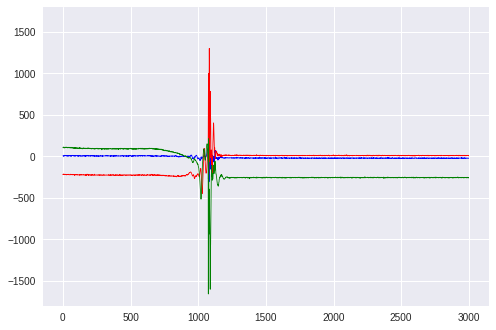

In [0]:
# import needed libraries
import matplotlib.pyplot as plt

# We can set an interval duration for display or use a fixed window size:
time_seg = 3
#window_size = int(len(df_Mediciones)/time_seg)
window_size = 3000
num_of_windows = len(df_Mediciones)- window_size + 1
win_ID=0

speed = 1

for index_win in range(int(num_of_windows/speed)):
    sensor_1_X = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_X"]]["S1_X"])
    sensor_1_Y = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_Y"]]["S1_Y"])
    sensor_1_Z = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_Z"]]["S1_Z"])
    
    plt.plot(range(window_size),sensor_1_X, color='blue', linewidth=0.8)
    plt.plot(range(window_size),sensor_1_Y, color='red', linewidth=0.8)
    plt.plot(range(window_size),sensor_1_Z, color='green', linewidth=0.8)
    plt.ylim(-1800,1800)
    
    plt.show()
    